In [1]:
import inspect
import warnings

warnings.filterwarnings("ignore")

import umap
from pmlb import fetch_data  # , classification_dataset_names
from scipy.stats import entropy, mannwhitneyu
# from seaborn import scatterplot
from sklearn.model_selection import train_test_split

from gower.gower_dist import *

pd.options.display.float_format = '{:.6f}'.format

plt.style.use("dark_background")

optimize = optimize_agglo

### This is a battery of tests to see how well various clustering evaluation metrics perform on a variety of datasets.

The datasets are all from the Penn Machine Learning Benchmark.

Each dataset is capped at 2,000 rows (stratified `train_test_split` with `random_state=42`).

The target variable is either binary or categorical.

### Dataset Selection:

All datasets were run through the `optimize_agglo` function with the default parameters.

If the maximum possible Gini-weighted average of Adjusted Mutual Information and Adjusted Rand Index across the grid of distance threshold values were greater than 0.4, the dataset was included in the analysis.

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

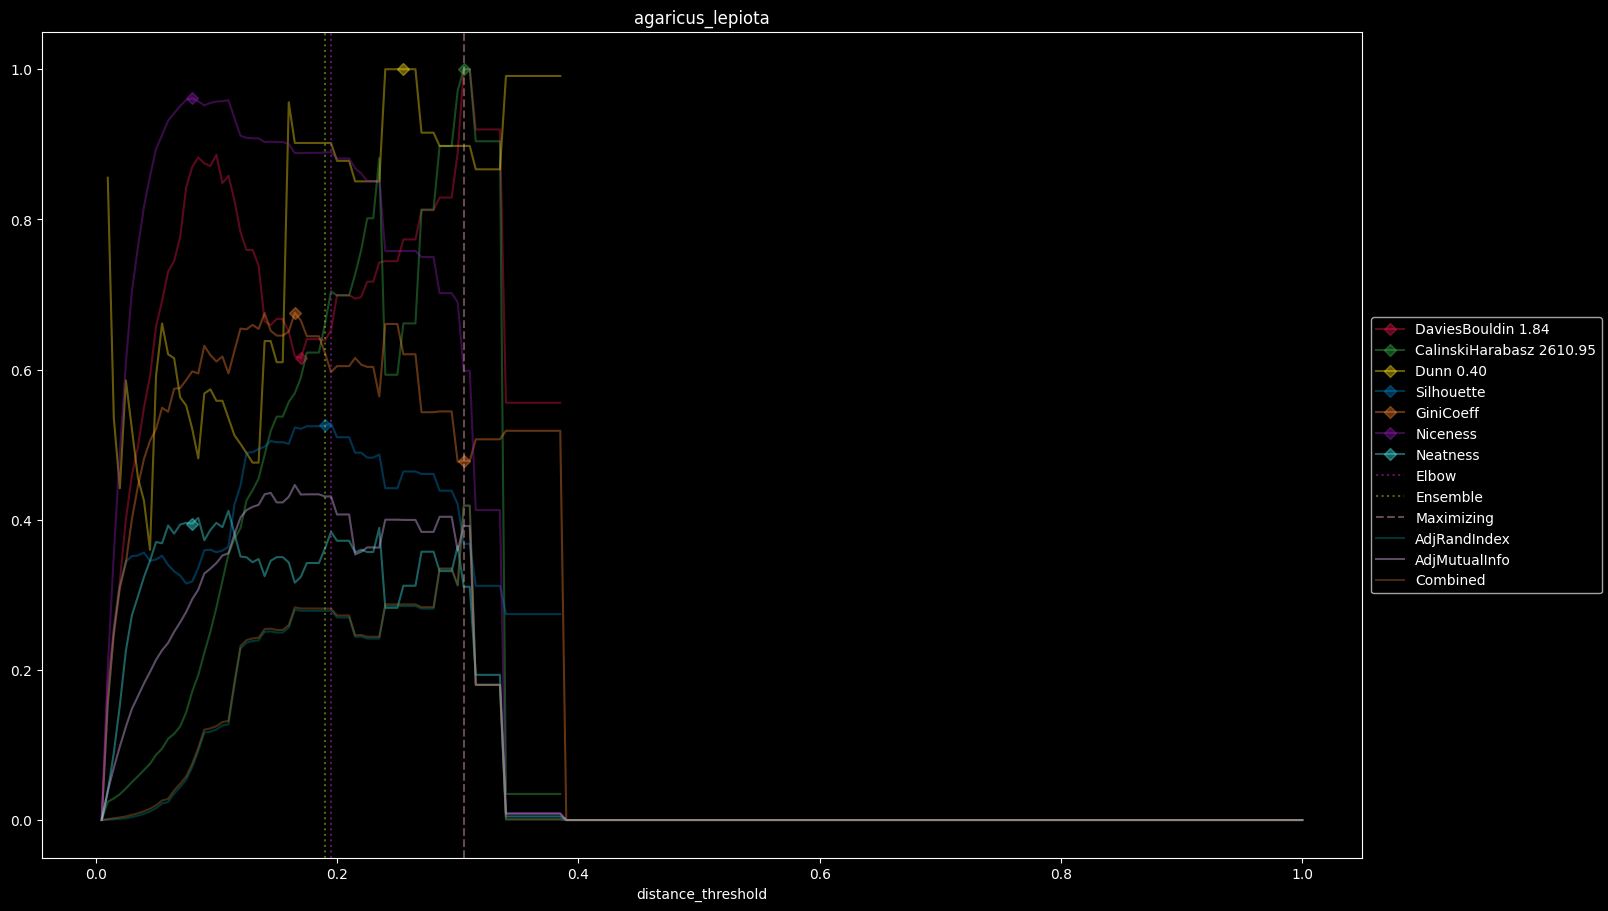

{'Silhouette': 0.3678680053596807, 'Niceness': 0.5983786347219119, 'GiniCoeff': 0.47840618460823064, 'Neatness': 0.3107208976322171, 'sample': {'distance_threshold': 0.305, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {9: 1, 308: 1, 528: 1, 1155: 1}, 'DaviesBouldin': 1.8439702814774224, 'CalinskiHarabasz': 2610.9491757755604, 'Dunn': 0.3570187865097417, 'AdjRandIndex': 0.41909299128398814, 'AdjMutualInfo': 0.3916402087066686, 'Combined': 0.4185472547319396}
0    1038
1     962
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d     22.000000
k      2.000000
e      0.692425
g      0.019879
Name: agaricus_lepiota, dtype: float64


  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/841 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

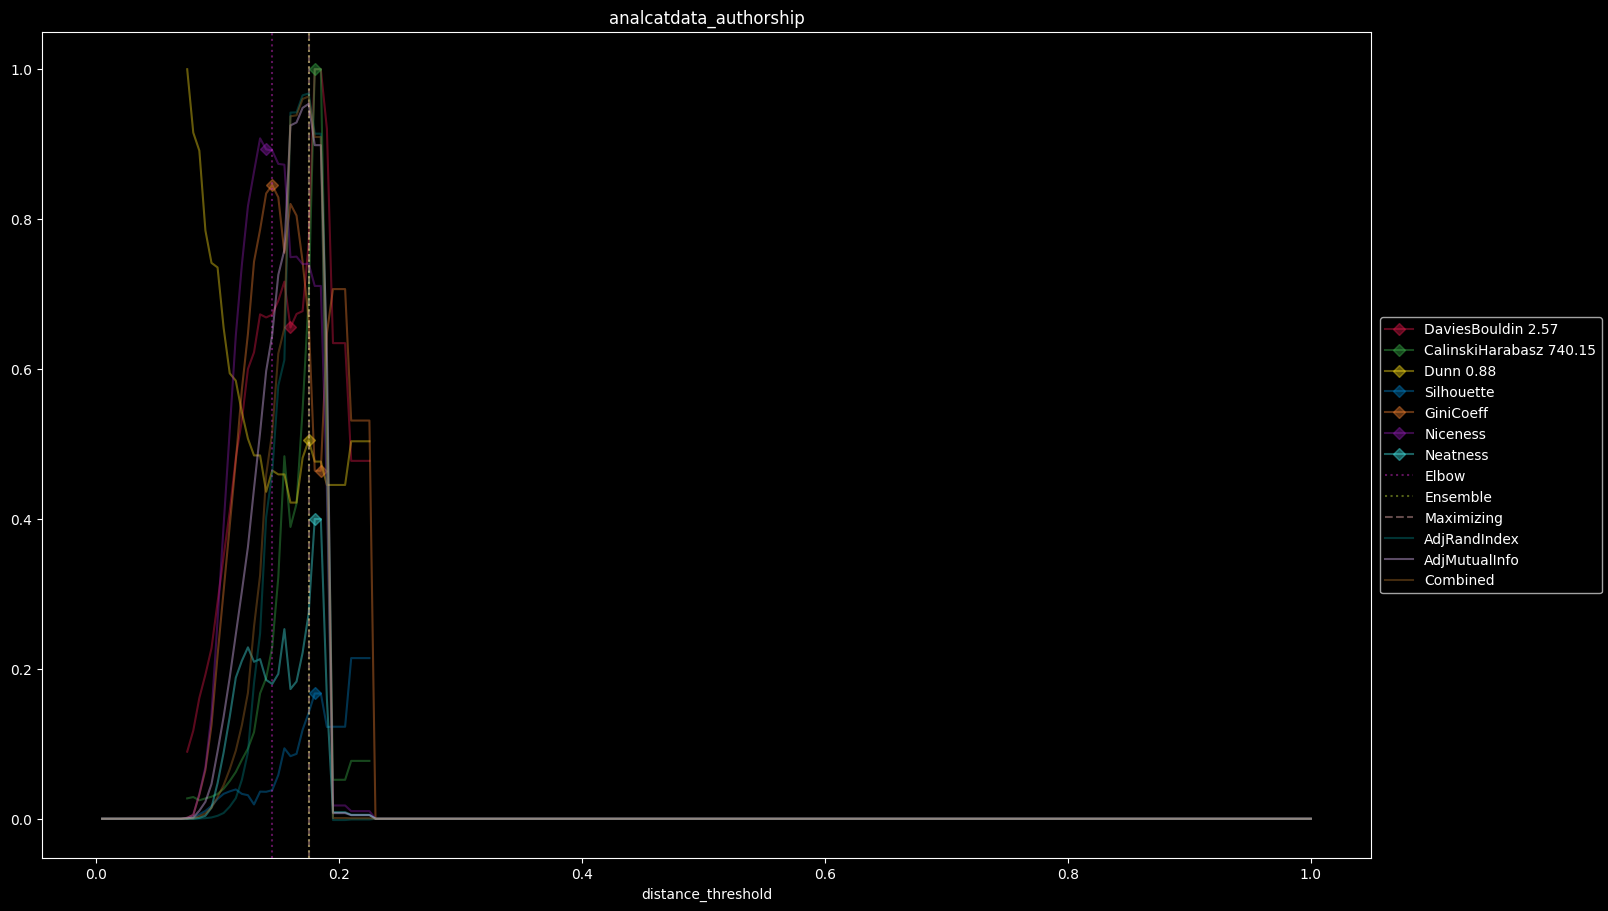

{'Silhouette': 0.141266431462078, 'Niceness': 0.7405702259780766, 'GiniCoeff': 0.665656887755102, 'Neatness': 0.27424024985517165, 'sample': {'distance_threshold': 0.175, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 1, 3: 2, 4: 1, 55: 1, 174: 1, 287: 1, 314: 1}, 'DaviesBouldin': 1.9711972734826262, 'CalinskiHarabasz': 515.380612916275, 'Dunn': 0.44209489504940364, 'AdjRandIndex': 0.9676308175806052, 'AdjMutualInfo': 0.9537722960884977, 'Combined': 0.9636137907833073}
0    317
1    296
3    173
2     55
Name: count, dtype: int64
Dataset Summary
n   841.000000
d    70.000000
k     4.000000
e     1.238942
g     0.289860
Name: analcatdata_authorship, dtype: float64


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/699 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

{'Silhouette': 0.4858914858407512, 'Niceness': 0.606714140595063, 'GiniCoeff': 0.8252005943536405, 'Neatness': 0.17809807647149623, 'sample': {'distance_threshold': 0.255, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 1, 2: 1, 3: 1, 4: 3, 7: 1, 10: 1, 14: 1, 19: 1, 27: 1, 28: 1, 63: 1, 69: 1, 444: 1}, 'DaviesBouldin': 1.9655248596307482, 'CalinskiHarabasz': 327.581529010583, 'Dunn': 0.27669751594223757, 'AdjRandIndex': 0.7254323575747712, 'AdjMutualInfo': 0.5330655880233846, 'Combined': 0.6931787672684139}
0    458
1    241
Name: count, dtype: int64
Dataset Summary
n   699.000000
d    10.000000
k     2.000000
e     0.644154
g     0.167667
Name: breast, dtype: float64


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/569 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

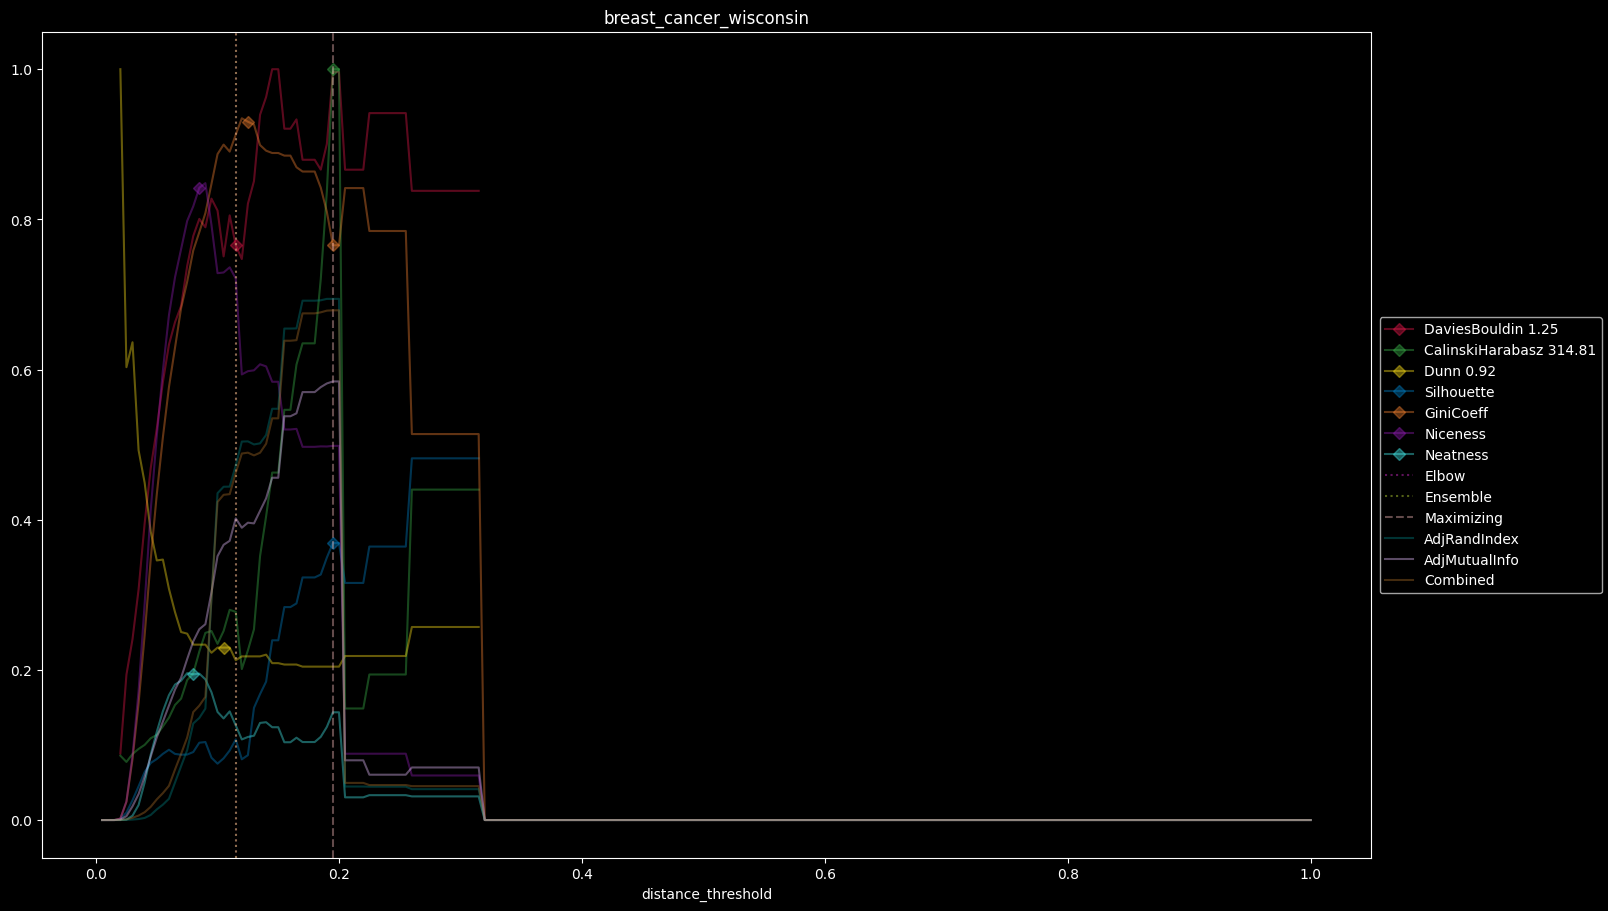

{'Silhouette': 0.3689079924186501, 'Niceness': 0.49835139389421224, 'GiniCoeff': 0.7655364978061427, 'Neatness': 0.14349770323387787, 'sample': {'distance_threshold': 0.195, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 1, 4: 2, 15: 1, 160: 1, 385: 1}, 'DaviesBouldin': 1.2450339208594108, 'CalinskiHarabasz': 314.80553610784114, 'Dunn': 0.18714400725304445, 'AdjRandIndex': 0.6941464166407882, 'AdjMutualInfo': 0.5841595262643937, 'Combined': 0.6788789902941647}
0    357
1    212
Name: count, dtype: int64
Dataset Summary
n   569.000000
d    30.000000
k     2.000000
e     0.660316
g     0.138811
Name: breast_cancer_wisconsin, dtype: float64


  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/485 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

{'Silhouette': 0.1297931609339418, 'Niceness': 0.8551379381712955, 'GiniCoeff': 0.6294353594569577, 'Neatness': 0.3615494418716325, 'sample': {'distance_threshold': 0.16, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 2, 2: 3, 5: 1, 45: 1, 104: 1, 105: 1, 107: 1, 111: 1}, 'DaviesBouldin': 1.6003553698470796, 'CalinskiHarabasz': 292.71326362717093, 'Dunn': 0.24507797237279713, 'AdjRandIndex': 0.46959911743271227, 'AdjMutualInfo': 0.6472800005507138, 'Combined': 0.5209358040478707}
8     80
6     75
5     48
0     44
4     36
7     30
9     29
12    29
13    29
1     27
10    24
2     17
3     17
Name: count, dtype: int64
Dataset Summary
n   485.000000
d    23.000000
k    13.000000
e     2.447482
g     0.288926
Name: collins, dtype: float64


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

{'Silhouette': 0.5386730561899363, 'Niceness': 0.9137455908289241, 'GiniCoeff': 0.5906593406593407, 'Neatness': 0.4107435035971563, 'sample': {'distance_threshold': 0.075, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 4, 2: 1, 3: 1, 4: 2, 6: 1, 11: 1, 12: 1, 13: 2}, 'DaviesBouldin': 0.5205787181220363, 'CalinskiHarabasz': 139.88495411558281, 'Dunn': 0.17223285578337502, 'AdjRandIndex': 0.6483521570079614, 'AdjMutualInfo': 0.6951089231986718, 'Combined': 0.6483521570079614}
0    12
4    12
2    12
1    12
5    12
3    12
Name: count, dtype: int64
Dataset Summary
n   72.000000
d    3.000000
k    6.000000
e    1.791759
g    0.000000
Name: confidence, dtype: float64


  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/366 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

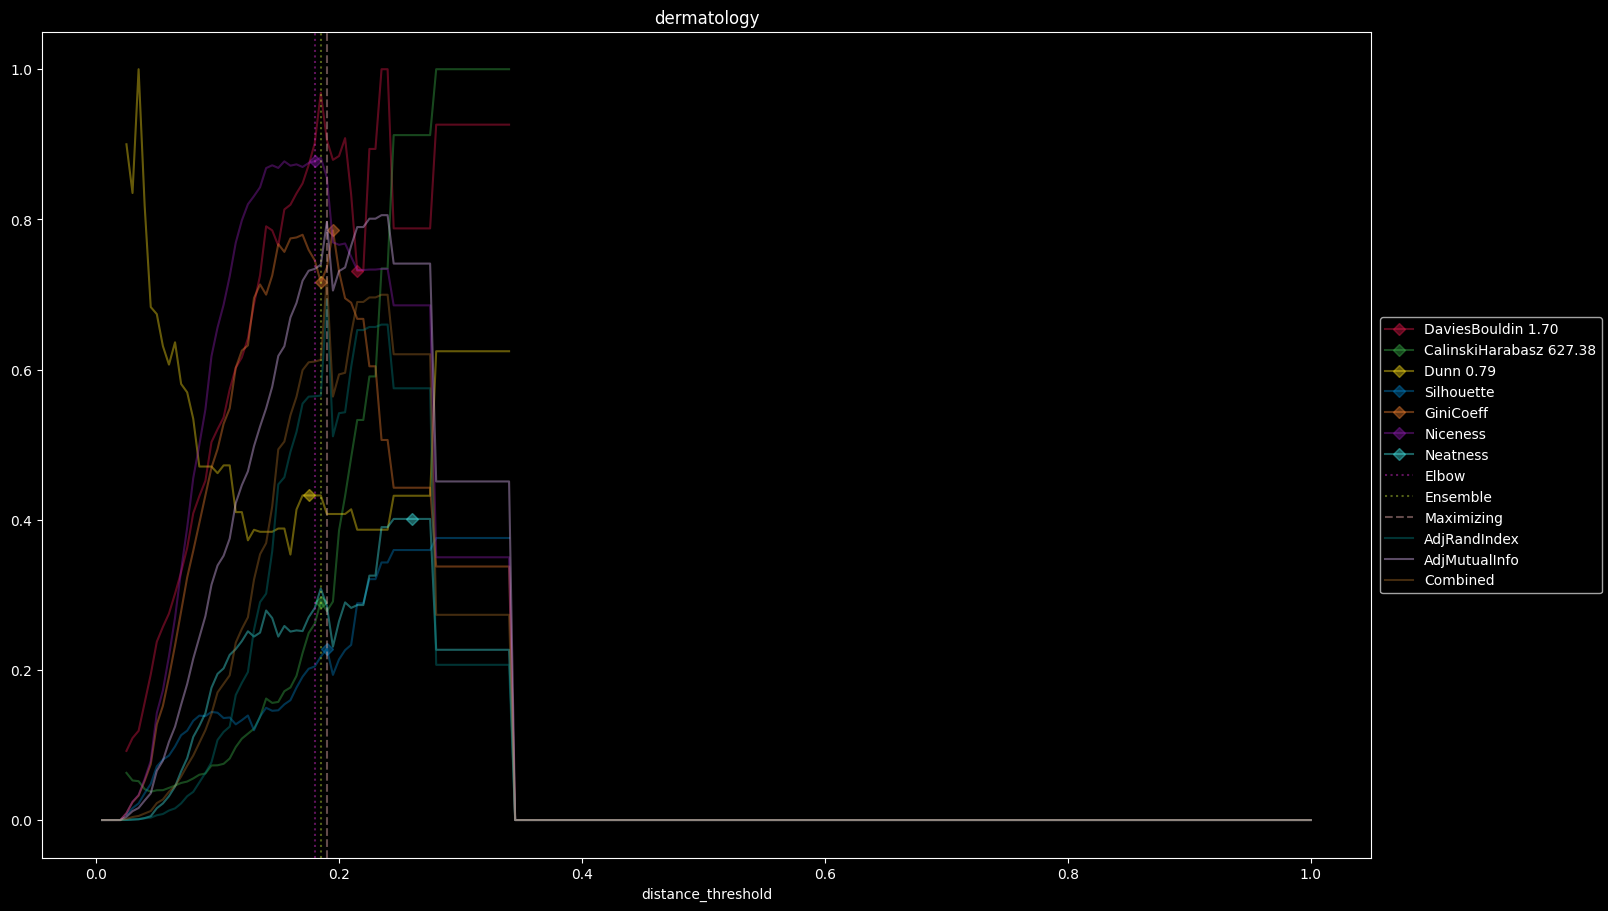

{'Silhouette': 0.22819660440245307, 'Niceness': 0.8556956315243281, 'GiniCoeff': 0.735745543814708, 'Neatness': 0.28510730979280263, 'sample': {'distance_threshold': 0.19, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 2, 2: 2, 3: 1, 4: 1, 6: 1, 7: 1, 9: 2, 10: 1, 51: 1, 70: 1, 80: 1, 111: 1}, 'DaviesBouldin': 1.5366227802077495, 'CalinskiHarabasz': 174.61750623810357, 'Dunn': 0.32157865740385877, 'AdjRandIndex': 0.6931234679028697, 'AdjMutualInfo': 0.7965376419461051, 'Combined': 0.7213308456131363}
1    112
3     72
2     61
5     52
4     49
6     20
Name: count, dtype: int64
Dataset Summary
n   366.000000
d    34.000000
k     6.000000
e     1.686148
g     0.272761
Name: dermatology, dtype: float64


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/327 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

{'Silhouette': 0.4219515007893117, 'Niceness': 0.7279824810860065, 'GiniCoeff': 0.520845231296402, 'Neatness': 0.3806425326804621, 'sample': {'distance_threshold': 0.2, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {2: 1, 8: 1, 69: 1, 104: 1, 144: 1}, 'DaviesBouldin': 1.3719569329244137, 'CalinskiHarabasz': 372.7750429342168, 'Dunn': 0.23169941003424477, 'AdjRandIndex': 0.7431364403991227, 'AdjMutualInfo': 0.6996032526550023, 'Combined': 0.7259518947859097}
0    143
1     77
7     52
4     35
5     20
Name: count, dtype: int64
Dataset Summary
n   327.000000
d     7.000000
k     5.000000
e     1.404712
g     0.394746
Name: ecoli, dtype: float64


  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/435 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

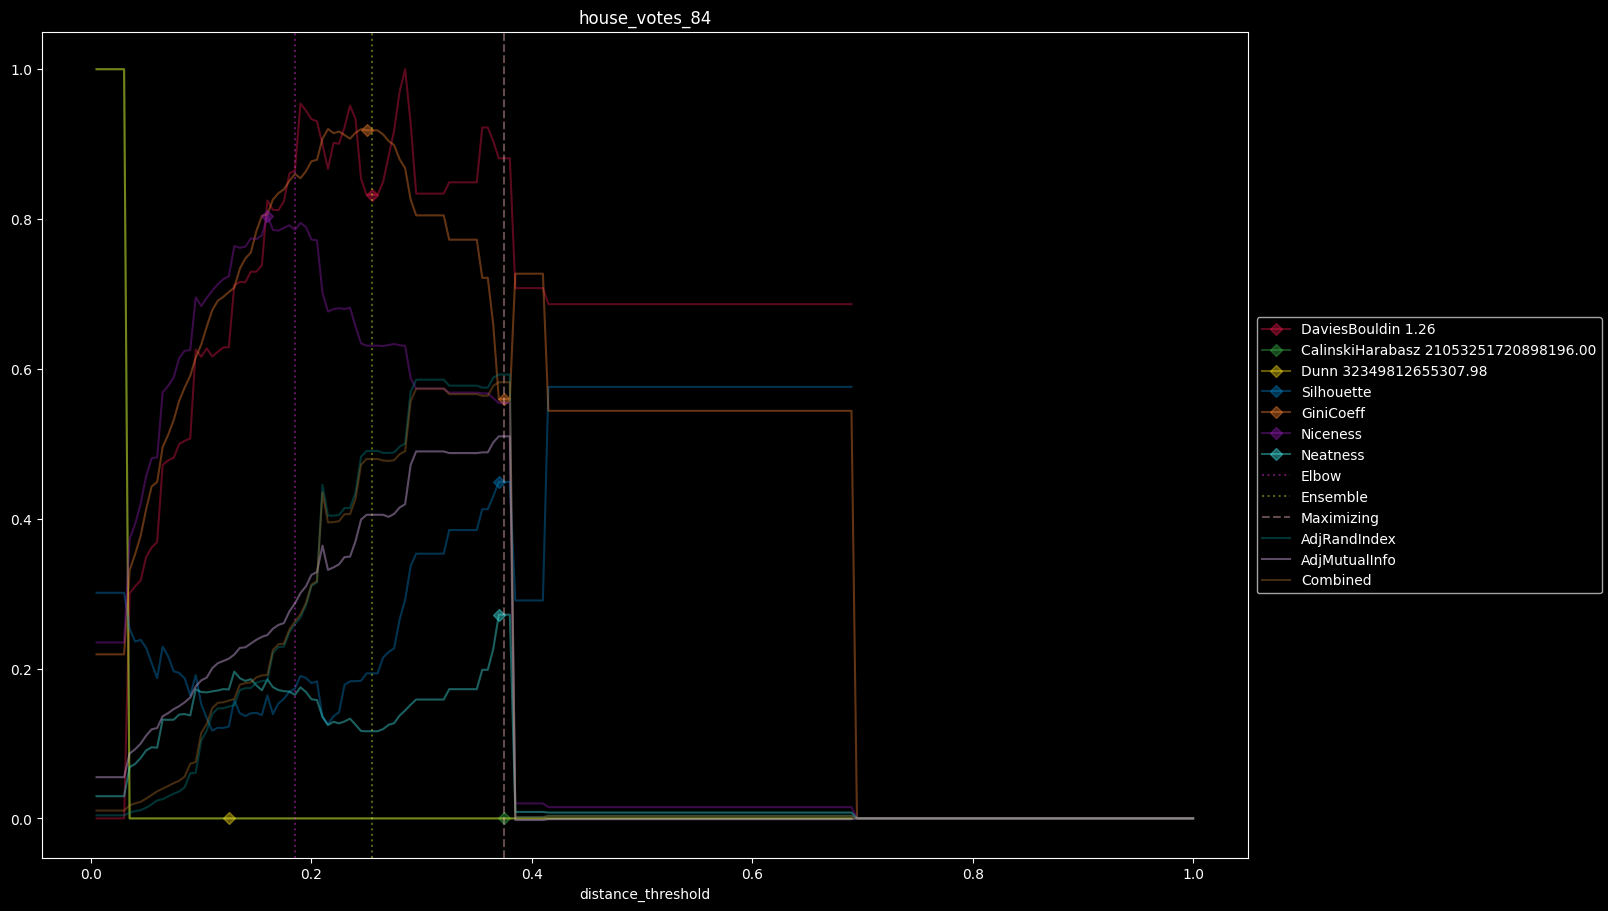

{'Silhouette': 0.4492397508735595, 'Niceness': 0.5544131685336512, 'GiniCoeff': 0.5598731884057971, 'Neatness': 0.2719375603682374, 'sample': {'distance_threshold': 0.375, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 1, 3: 1, 202: 1, 229: 1}, 'DaviesBouldin': 1.106925731808095, 'CalinskiHarabasz': 442.2585019314507, 'Dunn': 0.27163849778099913, 'AdjRandIndex': 0.5924979174356702, 'AdjMutualInfo': 0.5099929442682476, 'Combined': 0.5821399561304121}
0    267
1    168
Name: count, dtype: int64
Dataset Summary
n   435.000000
d    16.000000
k     2.000000
e     0.667021
g     0.125543
Name: house_votes_84, dtype: float64


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

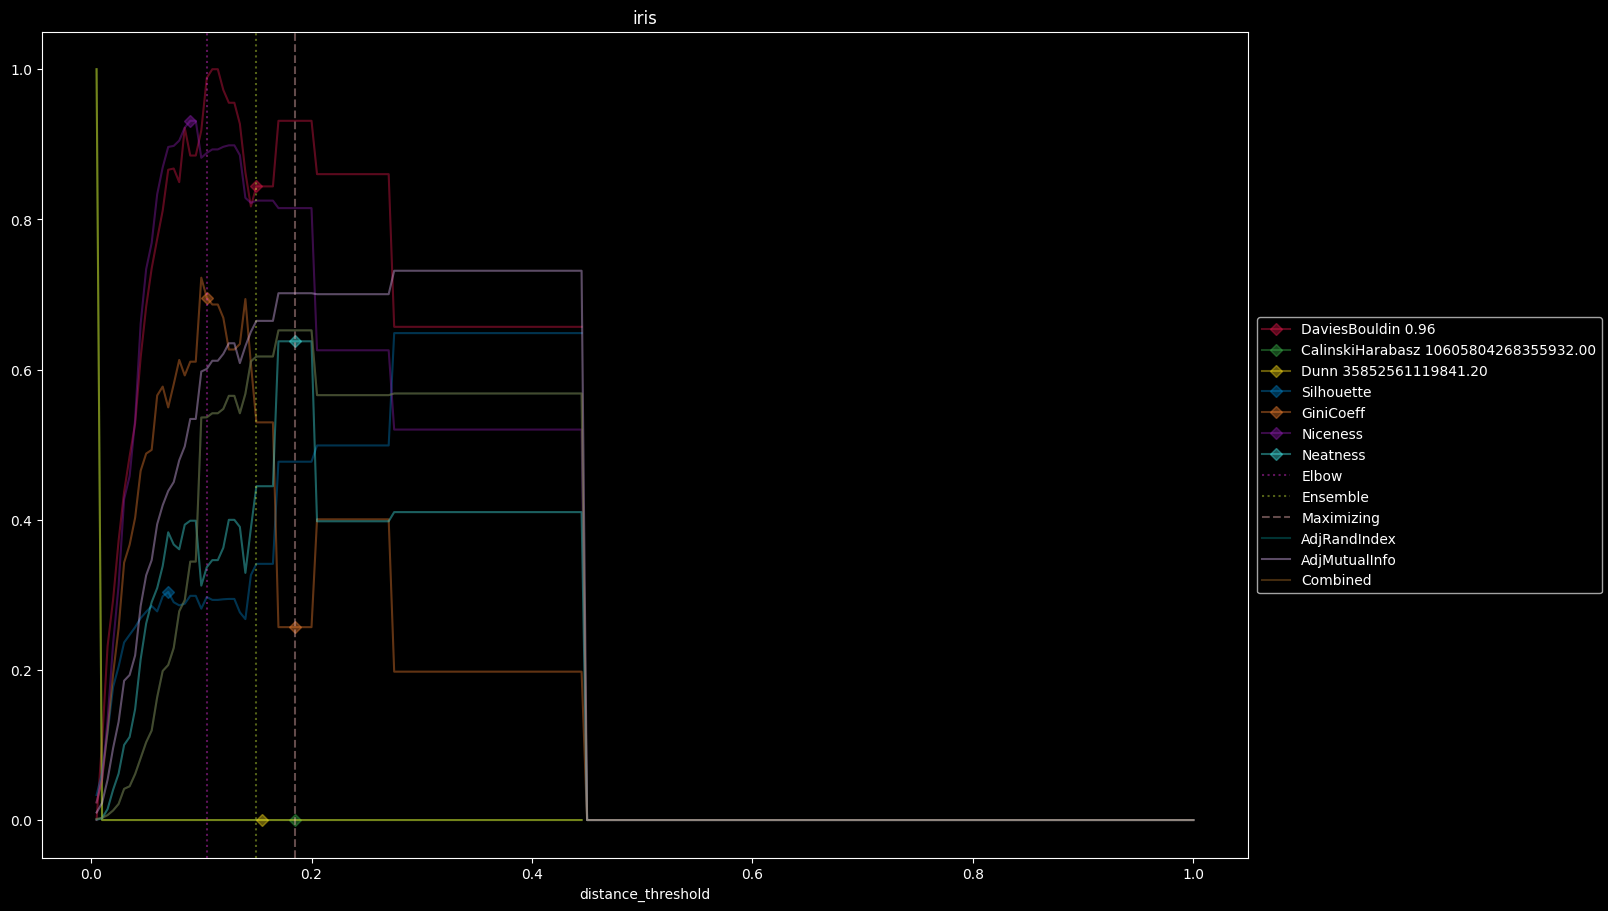

{'Silhouette': 0.47726025597204835, 'Niceness': 0.8149998805271983, 'GiniCoeff': 0.25691699604743085, 'Neatness': 0.6376183780066198, 'sample': {'distance_threshold': 0.185, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {12: 1, 37: 1, 50: 1, 51: 1}, 'DaviesBouldin': 0.897259395549169, 'CalinskiHarabasz': 375.60259226087175, 'Dunn': 0.17073763102706013, 'AdjRandIndex': 0.6521833727068936, 'AdjMutualInfo': 0.7016361903834069, 'Combined': 0.6521833727068936}
2    50
1    50
0    50
Name: count, dtype: int64
Dataset Summary
n   150.000000
d     4.000000
k     3.000000
e     1.098612
g     0.000000
Name: iris, dtype: float64


  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

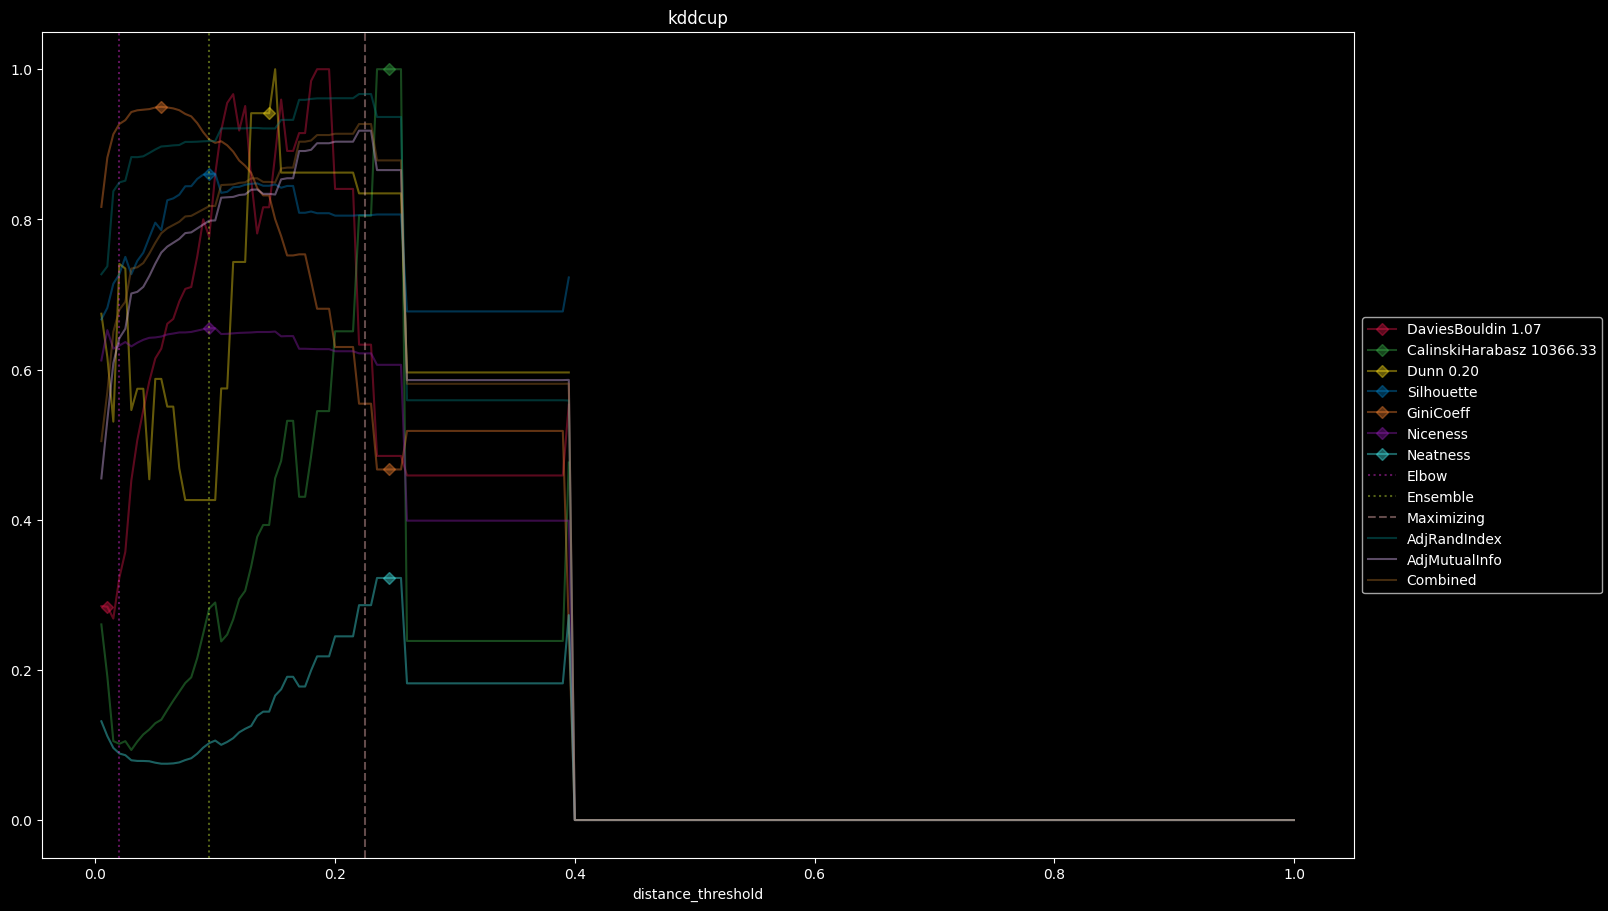

{'Silhouette': 0.8056634751599878, 'Niceness': 0.6215532694963989, 'GiniCoeff': 0.5545222041385724, 'Neatness': 0.28617702033110104, 'sample': {'distance_threshold': 0.225, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 1, 67: 1, 350: 1, 445: 1, 1137: 1}, 'DaviesBouldin': 0.6754219883484328, 'CalinskiHarabasz': 8344.425509468689, 'Dunn': 0.16627420032427906, 'AdjRandIndex': 0.9669292469740022, 'AdjMutualInfo': 0.9180998511609926, 'Combined': 0.9270104340857166}
18    1137
9      434
11     394
0        9
17       7
5        5
15       4
20       4
21       4
10       1
14       1
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d     41.000000
k     11.000000
e      1.076621
g      0.817516
Name: kddcup, dtype: float64


  0%|          | 0/216 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

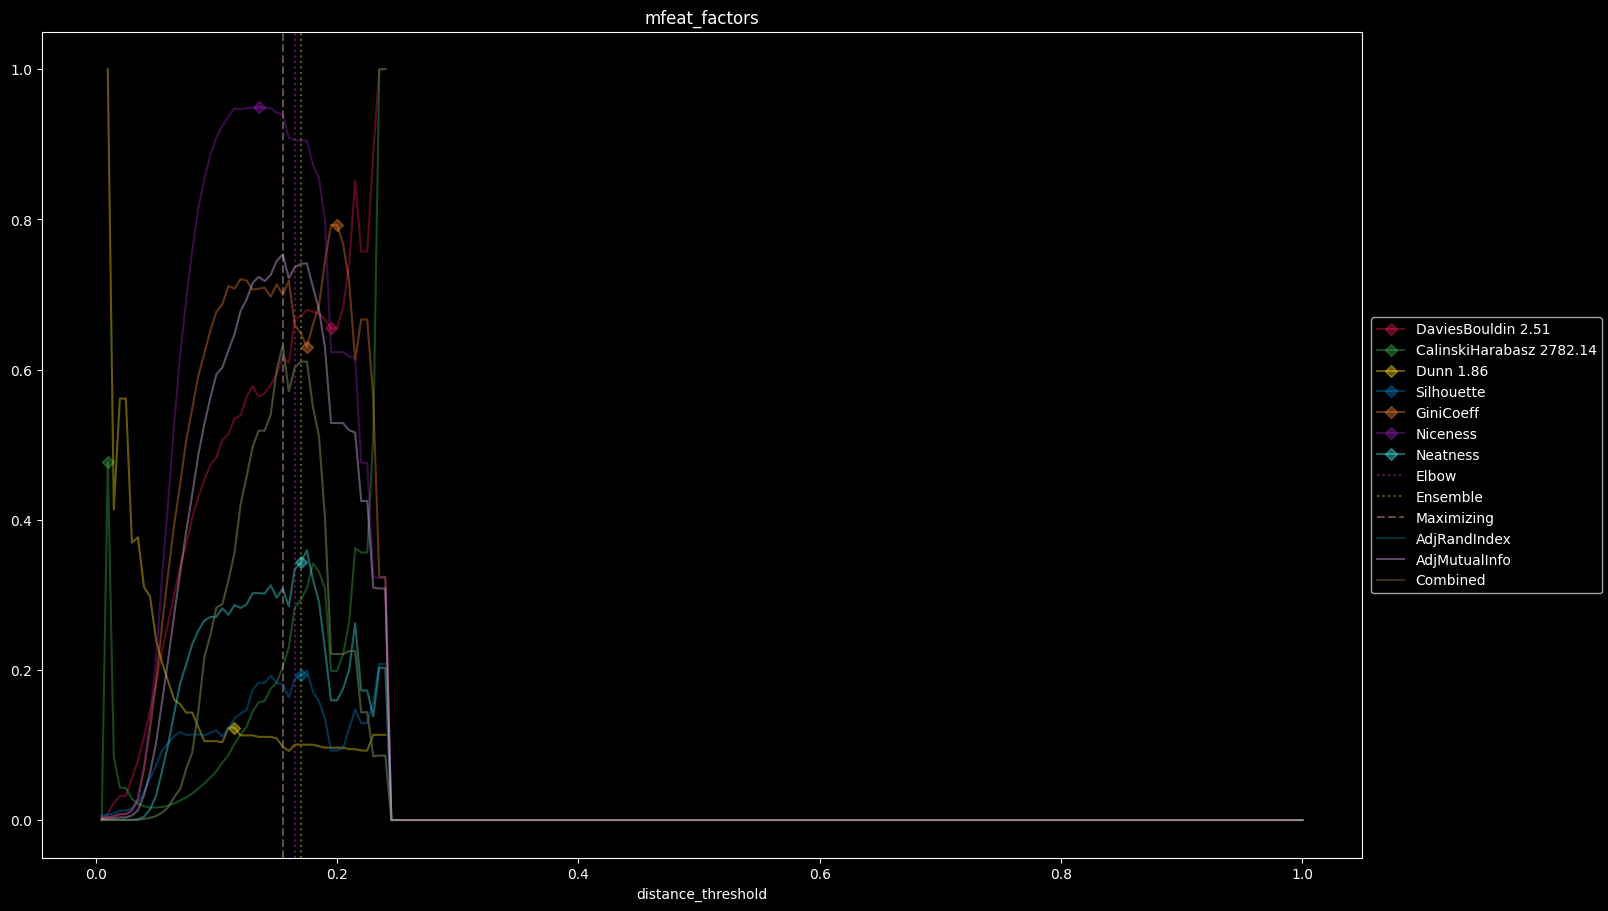

{'Silhouette': 0.1810096590645446, 'Niceness': 0.9394864272784895, 'GiniCoeff': 0.6996246720031887, 'Neatness': 0.3081238527435939, 'sample': {'distance_threshold': 0.155, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 7, 2: 3, 3: 1, 6: 1, 7: 1, 11: 1, 13: 2, 14: 2, 15: 1, 20: 1, 24: 1, 33: 1, 43: 1, 63: 1, 64: 1, 86: 1, 103: 1, 113: 1, 117: 1, 131: 1, 148: 1, 186: 1, 191: 1, 199: 1, 370: 1}, 'DaviesBouldin': 1.5441883437740778, 'CalinskiHarabasz': 567.9258073115014, 'Dunn': 0.18146352675680869, 'AdjRandIndex': 0.6324298046135716, 'AdjMutualInfo': 0.7532361033934265, 'Combined': 0.6324298046135716}
0    200
1    200
2    200
3    200
4    200
5    200
6    200
7    200
8    200
9    200
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d    216.000000
k     10.000000
e      2.302585
g      0.000000
Name: mfeat_factors, dtype: float64


  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

{'Silhouette': 0.09284618785681238, 'Niceness': 0.9006452381153228, 'GiniCoeff': 0.84833044193658, 'Neatness': 0.16899649168841435, 'sample': {'distance_threshold': 0.18, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 16, 2: 7, 3: 11, 4: 5, 5: 2, 6: 1, 7: 1, 8: 1, 9: 1, 11: 1, 14: 1, 16: 2, 19: 1, 22: 1, 25: 1, 27: 1, 32: 1, 33: 1, 40: 1, 48: 1, 63: 1, 107: 1, 130: 1, 136: 1, 150: 1, 184: 1, 378: 1, 426: 1}, 'DaviesBouldin': 1.9237419286639017, 'CalinskiHarabasz': 293.2263828868991, 'Dunn': 0.33640916821717337, 'AdjRandIndex': 0.43072956983476707, 'AdjMutualInfo': 0.5711424253386754, 'Combined': 0.43072956983476707}
0    200
1    200
2    200
3    200
4    200
5    200
6    200
7    200
8    200
9    200
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d     76.000000
k     10.000000
e      2.302585
g      0.000000
Name: mfeat_fourier, dtype: float64


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

{'Silhouette': 0.05440363752306872, 'Niceness': 0.9444770149566442, 'GiniCoeff': 0.7814129604410934, 'Neatness': 0.23221080951596615, 'sample': {'distance_threshold': 0.155, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 14, 2: 9, 3: 3, 4: 3, 6: 1, 7: 1, 8: 1, 9: 1, 10: 2, 12: 1, 13: 1, 18: 1, 21: 1, 24: 2, 26: 1, 28: 1, 38: 1, 45: 2, 83: 1, 109: 1, 130: 1, 153: 1, 160: 1, 167: 1, 179: 1, 182: 1, 199: 1, 241: 1}, 'DaviesBouldin': 2.071545008524435, 'CalinskiHarabasz': 430.42138056236405, 'Dunn': 0.40678678379742766, 'AdjRandIndex': 0.7190970979343196, 'AdjMutualInfo': 0.7875633772078564, 'Combined': 0.7190970979343196}
0    200
1    200
2    200
3    200
4    200
5    200
6    200
7    200
8    200
9    200
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d     64.000000
k     10.000000
e      2.302585
g      0.000000
Name: mfeat_karhunen, dtype: float64


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

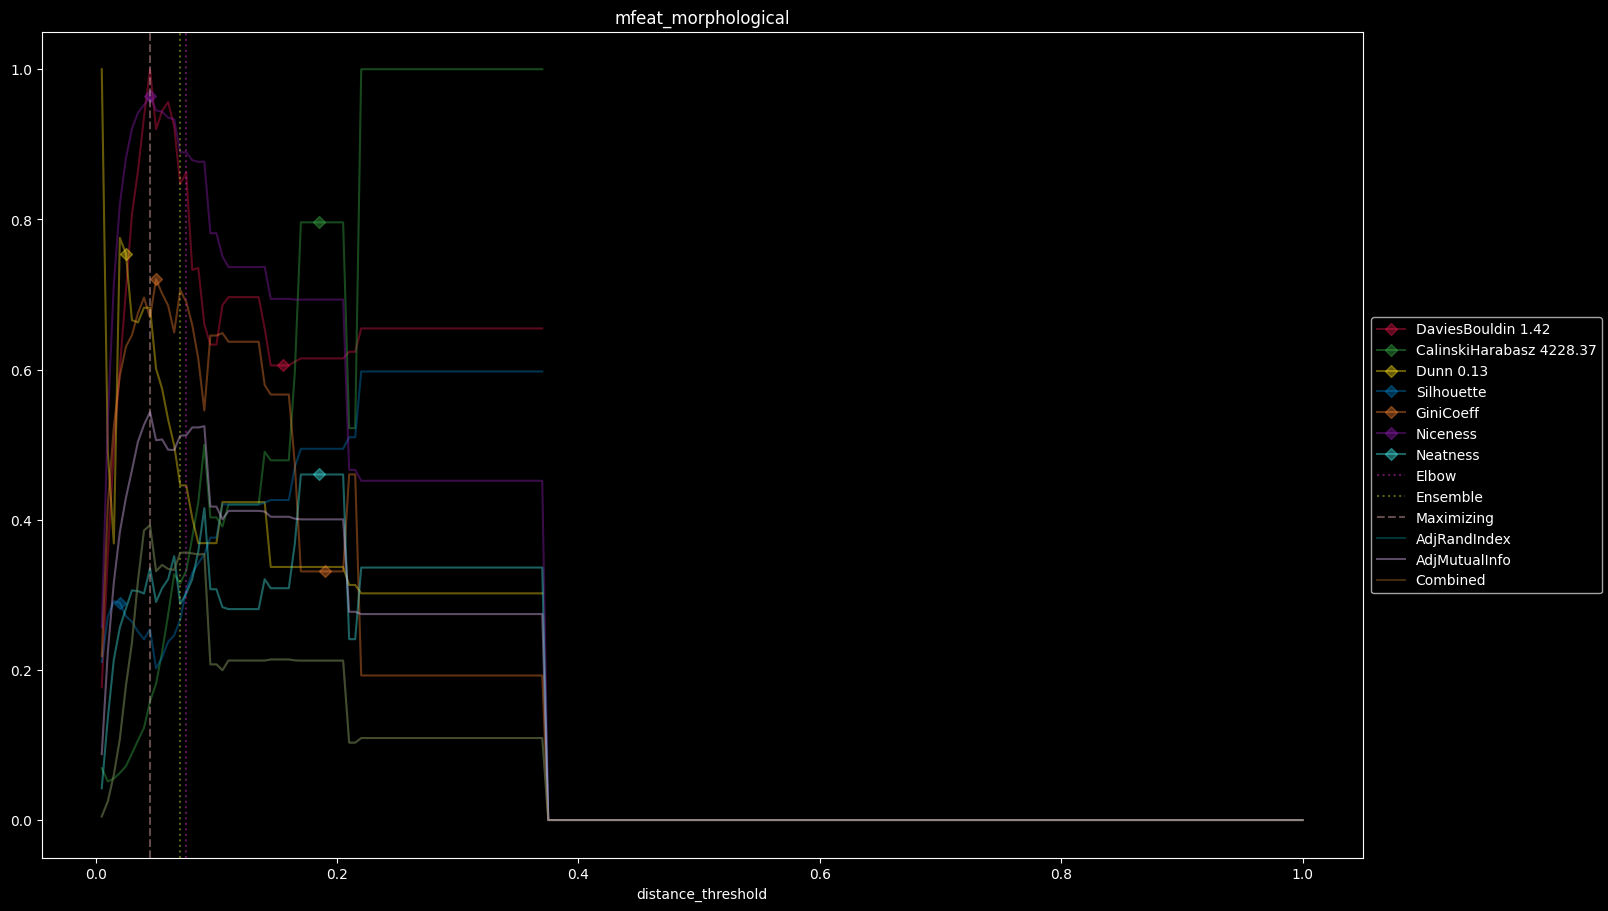

{'Silhouette': 0.2539570140295604, 'Niceness': 0.9639102265236178, 'GiniCoeff': 0.6693394017956958, 'Neatness': 0.335326824872263, 'sample': {'distance_threshold': 0.045, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 10, 2: 4, 3: 7, 4: 3, 5: 3, 6: 2, 7: 2, 8: 2, 9: 4, 10: 2, 12: 2, 13: 1, 14: 1, 20: 1, 21: 1, 24: 2, 28: 2, 30: 1, 31: 1, 32: 1, 33: 1, 35: 1, 38: 1, 42: 1, 43: 2, 46: 2, 50: 1, 51: 1, 59: 1, 60: 1, 61: 1, 67: 1, 70: 1, 72: 1, 75: 1, 81: 1, 170: 1, 195: 1, 210: 1}, 'DaviesBouldin': 1.422948042531105, 'CalinskiHarabasz': 668.7898317536003, 'Dunn': 0.09127348533245601, 'AdjRandIndex': 0.3927197869882485, 'AdjMutualInfo': 0.5434276020406054, 'Combined': 0.3927197869882485}
0    200
1    200
2    200
3    200
4    200
5    200
6    200
7    200
8    200
9    200
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d      6.000000
k     10.000000
e      2.302585
g      0.000000
Name: mfeat_morphological, dtype: float64


  0%|          | 0/240 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

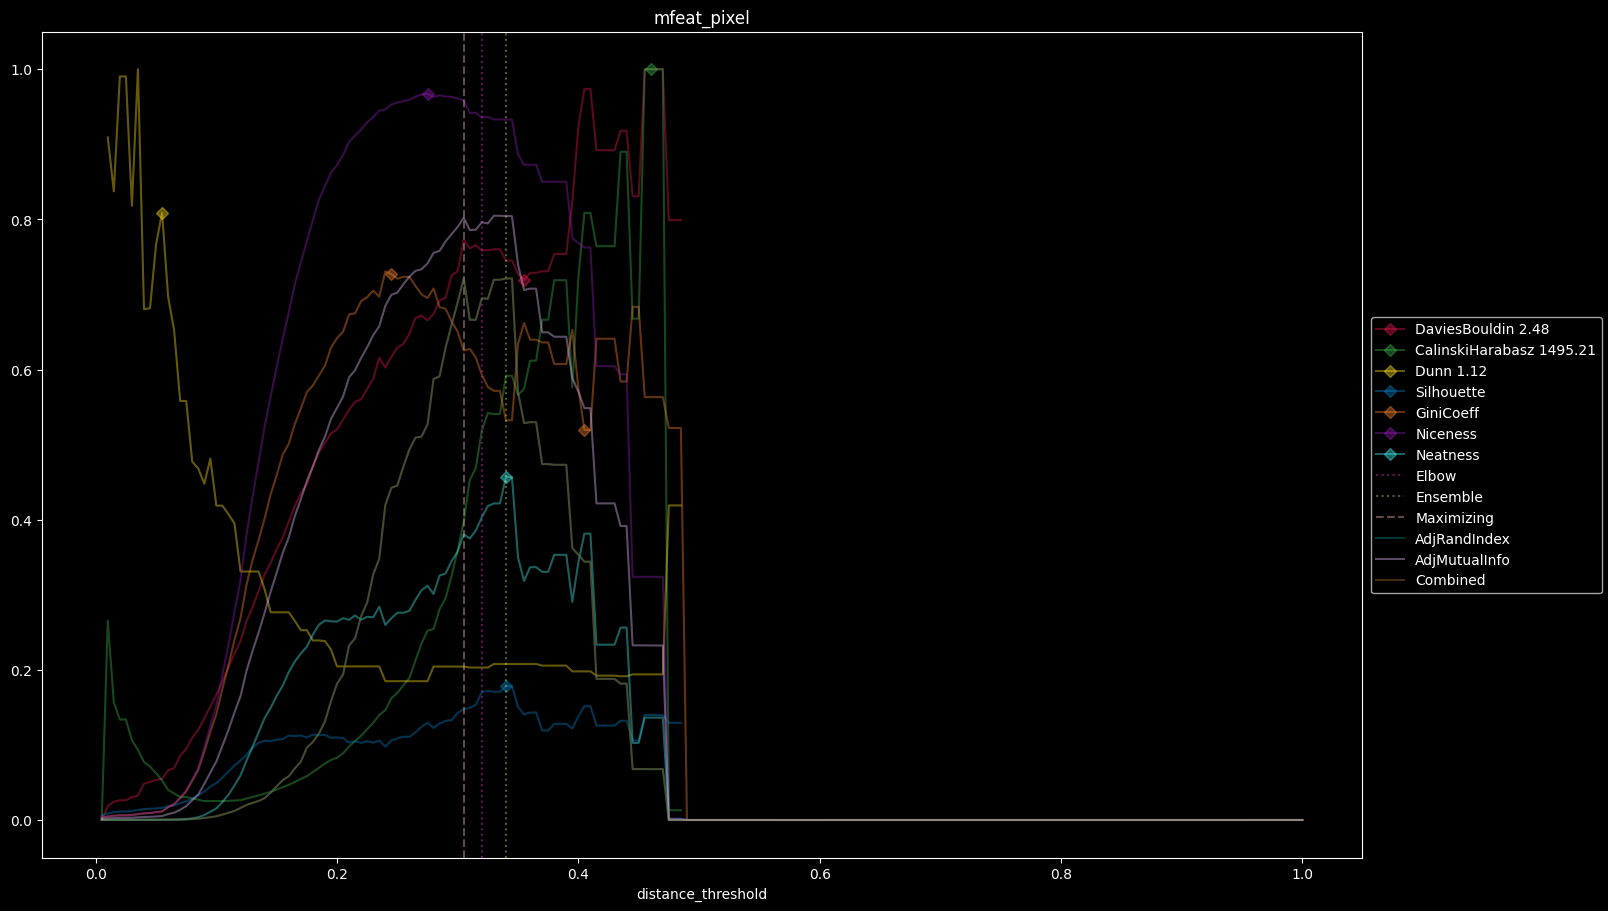

{'Silhouette': 0.14742684156626013, 'Niceness': 0.9581620309328797, 'GiniCoeff': 0.6252376328350452, 'Neatness': 0.3806155445693747, 'sample': {'distance_threshold': 0.305, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 5, 3: 1, 7: 1, 9: 1, 10: 3, 11: 1, 12: 2, 14: 1, 17: 1, 19: 2, 20: 1, 25: 1, 35: 1, 55: 1, 80: 1, 83: 1, 91: 1, 97: 1, 116: 1, 155: 1, 161: 1, 166: 1, 171: 1, 191: 2, 205: 1}, 'DaviesBouldin': 1.9136236277989858, 'CalinskiHarabasz': 594.4562239746728, 'Dunn': 0.2298377699682603, 'AdjRandIndex': 0.7216970697978945, 'AdjMutualInfo': 0.8021877628329735, 'Combined': 0.7216970697978945}
0    200
1    200
2    200
3    200
4    200
5    200
6    200
7    200
8    200
9    200
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d    240.000000
k     10.000000
e      2.302585
g      0.000000
Name: mfeat_pixel, dtype: float64


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

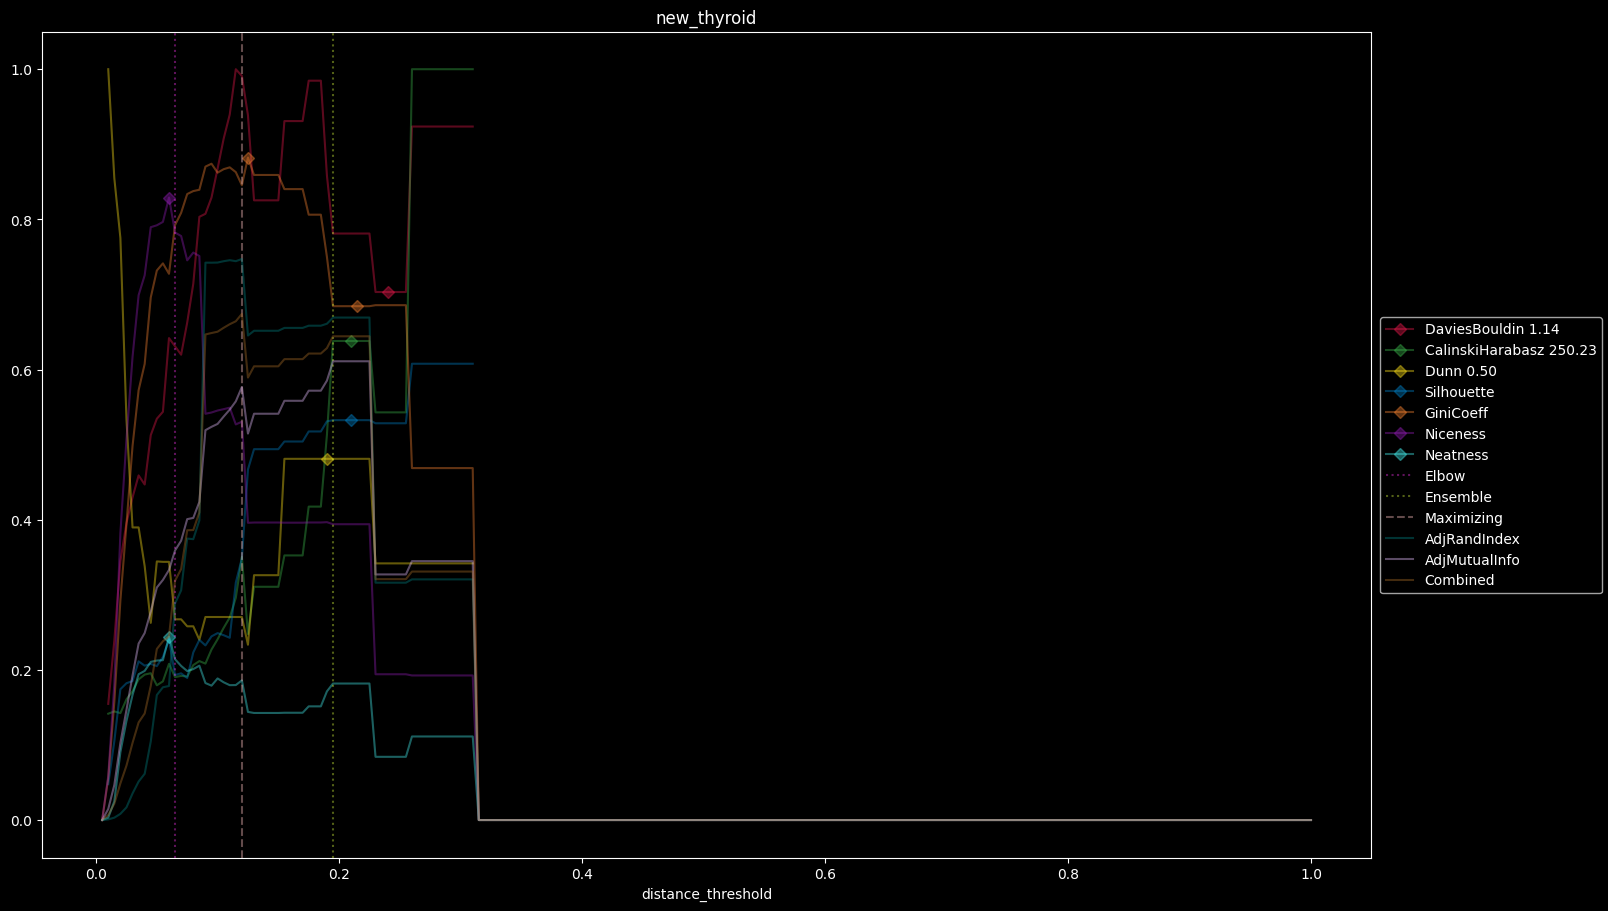

{'Silhouette': 0.3487242085898186, 'Niceness': 0.5305229485396384, 'GiniCoeff': 0.8454545454545455, 'Neatness': 0.18603263678842008, 'sample': {'distance_threshold': 0.12, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 1, 2: 2, 3: 2, 5: 1, 7: 1, 10: 1, 11: 1, 19: 1, 152: 1}, 'DaviesBouldin': 1.1250660532760854, 'CalinskiHarabasz': 87.6958221377228, 'Dunn': 0.1339017936171292, 'AdjRandIndex': 0.7472396095182403, 'AdjMutualInfo': 0.5766370238441718, 'Combined': 0.6741242156579252}
1    150
2     35
3     30
Name: count, dtype: int64
Dataset Summary
n   215.000000
d     5.000000
k     3.000000
e     0.821483
g     0.428571
Name: new_thyroid, dtype: float64


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

{'Silhouette': 0.12216367279511972, 'Niceness': 0.9543287526922686, 'GiniCoeff': 0.698983787094323, 'Neatness': 0.31047802757789383, 'sample': {'distance_threshold': 0.215, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 6, 2: 5, 3: 3, 4: 2, 7: 2, 10: 1, 11: 5, 15: 1, 24: 1, 27: 1, 55: 1, 56: 1, 65: 1, 73: 1, 109: 1, 123: 1, 124: 1, 137: 1, 154: 1, 164: 1, 185: 1, 187: 1, 194: 1, 196: 1}, 'DaviesBouldin': 1.8396206381068931, 'CalinskiHarabasz': 545.9154596955293, 'Dunn': 0.2704477676562035, 'AdjRandIndex': 0.73359678620109, 'AdjMutualInfo': 0.8188555268743776, 'Combined': 0.7341855294231306}
3    204
1    203
4    202
7    201
9    200
5    199
6    199
2    198
8    197
0    197
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d     64.000000
k     10.000000
e      2.302518
g      0.006905
Name: optdigits, dtype: float64


  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

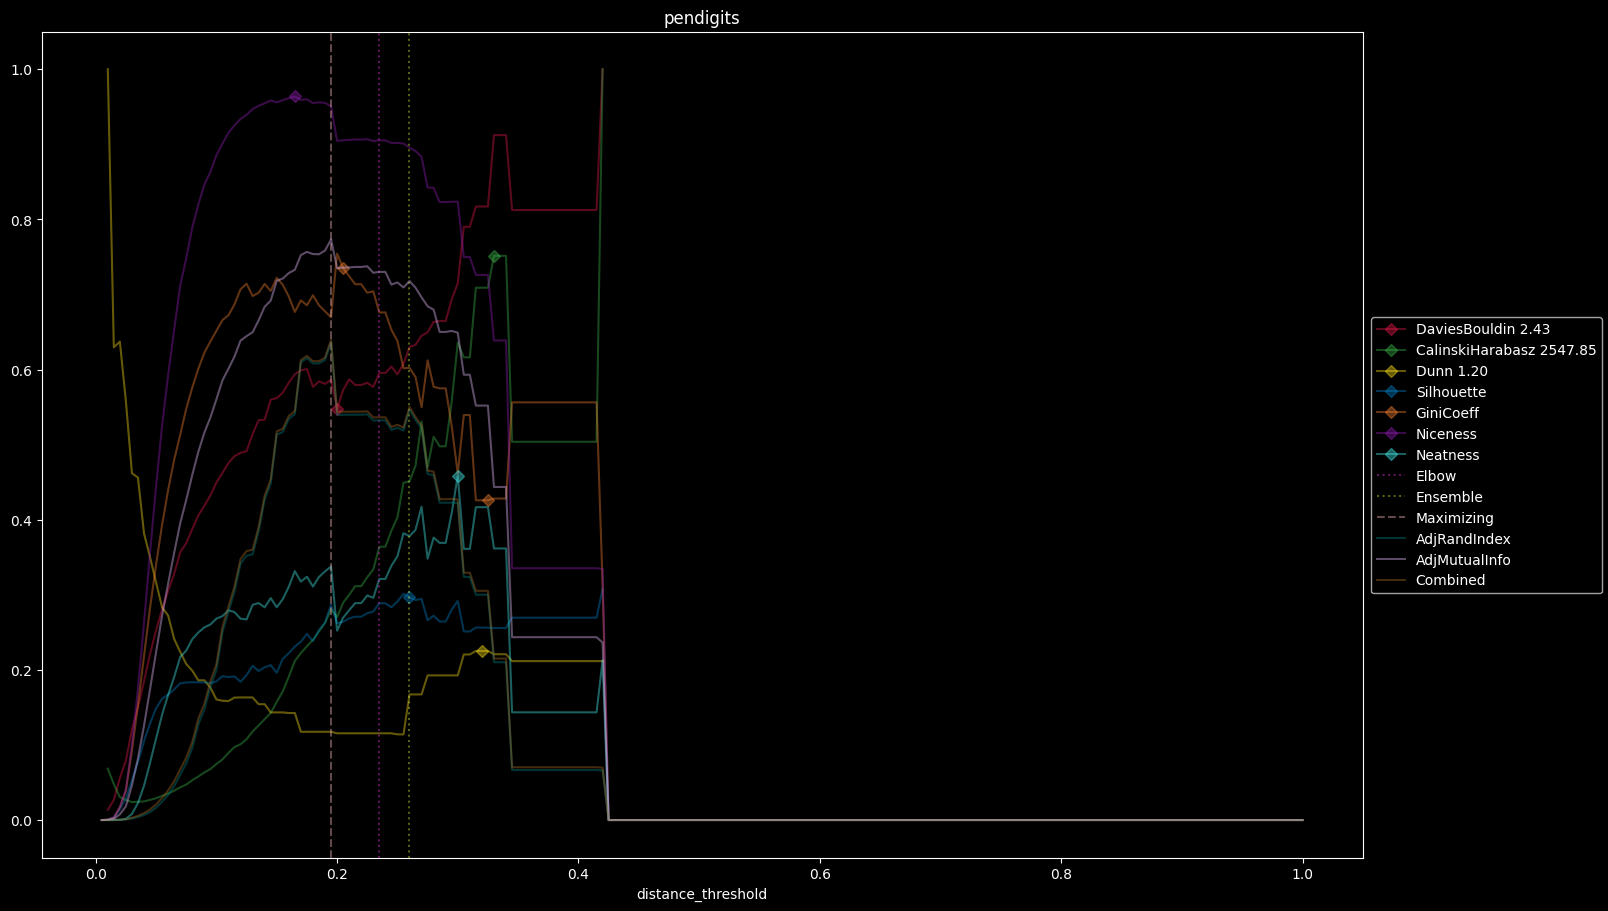

{'Silhouette': 0.28694059558578955, 'Niceness': 0.9507302705441742, 'GiniCoeff': 0.6695519314445145, 'Neatness': 0.33755239521295616, 'sample': {'distance_threshold': 0.195, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 3, 2: 4, 3: 2, 5: 3, 7: 1, 9: 1, 10: 1, 17: 1, 18: 2, 21: 1, 22: 1, 25: 1, 27: 1, 60: 1, 65: 1, 81: 1, 86: 1, 116: 1, 117: 2, 141: 1, 153: 1, 161: 1, 192: 1, 233: 1, 272: 1}, 'DaviesBouldin': 1.42441771956133, 'CalinskiHarabasz': 715.2146649433058, 'Dunn': 0.1407121026524794, 'AdjRandIndex': 0.6365514505826687, 'AdjMutualInfo': 0.7733974768232675, 'Combined': 0.6394150037939345}
1    208
7    208
2    208
4    208
0    208
8    192
5    192
6    192
3    192
9    192
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d     16.000000
k     10.000000
e      2.301785
g      0.020925
Name: pendigits, dtype: float64


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/333 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

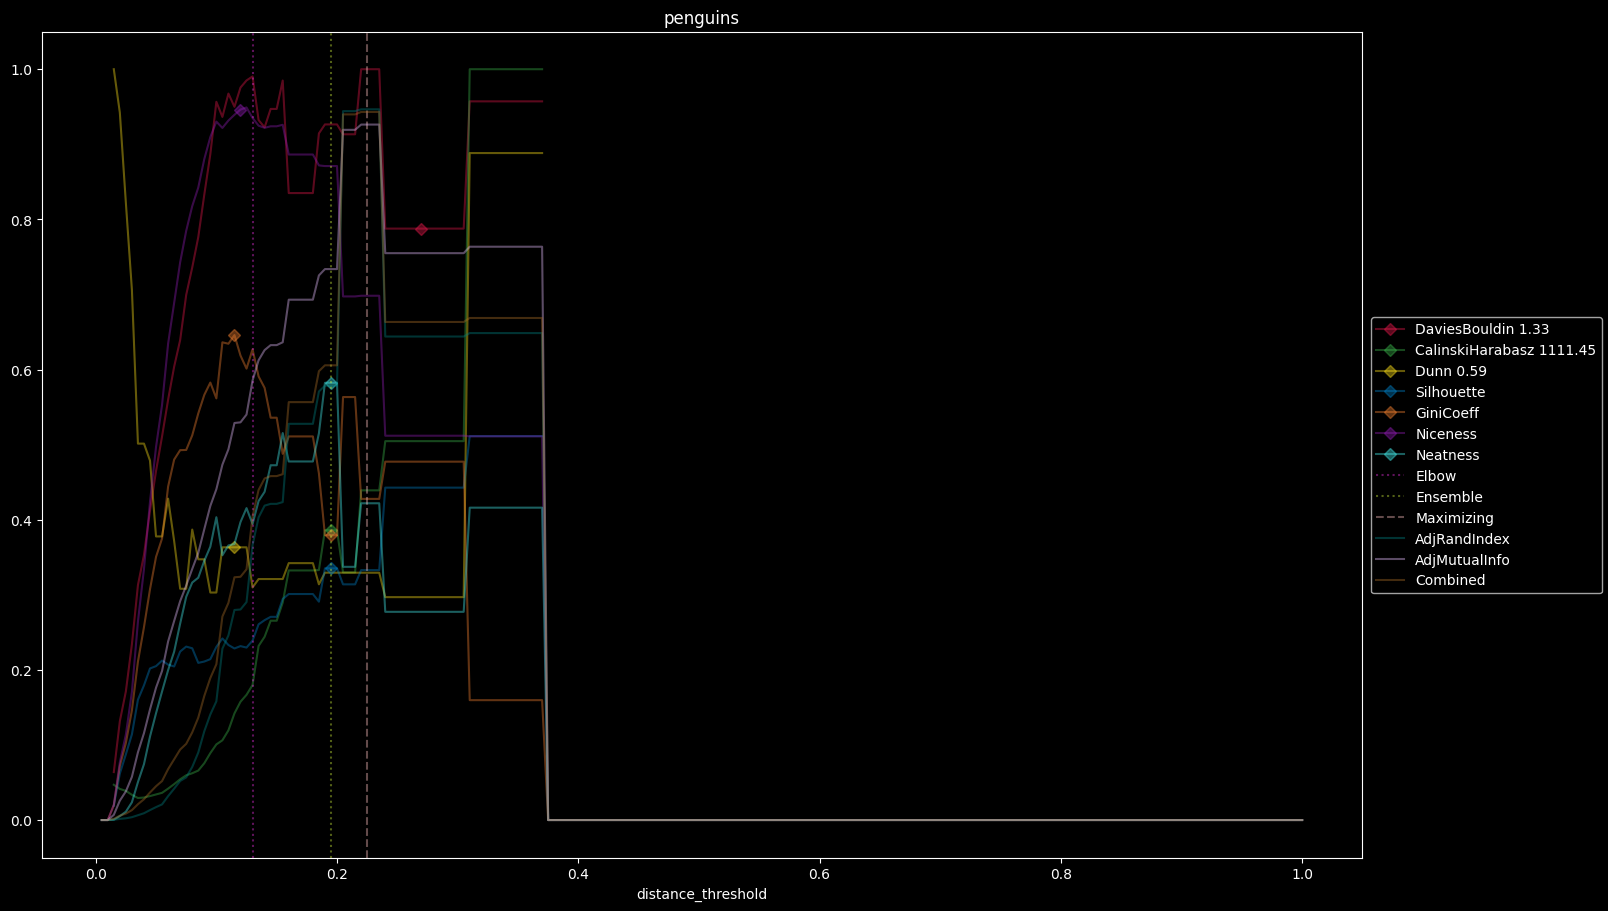

{'Silhouette': 0.3328398142200902, 'Niceness': 0.6982909573948878, 'GiniCoeff': 0.42773109243697477, 'Neatness': 0.42187556561970646, 'sample': {'distance_threshold': 0.225, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 1, 62: 1, 118: 1, 152: 1}, 'DaviesBouldin': 1.3336445240073276, 'CalinskiHarabasz': 488.0436223866292, 'Dunn': 0.19549218895946155, 'AdjRandIndex': 0.9465809308898748, 'AdjMutualInfo': 0.9262724111768521, 'Combined': 0.9430312064358338}
0    146
2    119
1     68
Name: count, dtype: int64
Dataset Summary
n   333.000000
d     7.000000
k     3.000000
e     1.053642
g     0.174790
Name: penguins, dtype: float64


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

{'Silhouette': 0.027394459728237636, 'Niceness': 0.5336353149515239, 'GiniCoeff': 0.6677431431727372, 'Neatness': 0.14258373088322934, 'sample': {'distance_threshold': 0.105, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 396, 2: 155, 3: 39, 4: 23, 5: 5, 6: 4, 7: 2, 8: 1, 1014: 1}, 'DaviesBouldin': 0.9583445873878306, 'CalinskiHarabasz': 46.821252022936804, 'Dunn': 0.4690720649822736, 'AdjRandIndex': 0.43283125744284084, 'AdjMutualInfo': 0.1774474367759445, 'Combined': 0.4314952574509772}
1    1010
0     990
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d     20.000000
k      2.000000
e      0.693097
g      0.005231
Name: ring, dtype: float64


  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

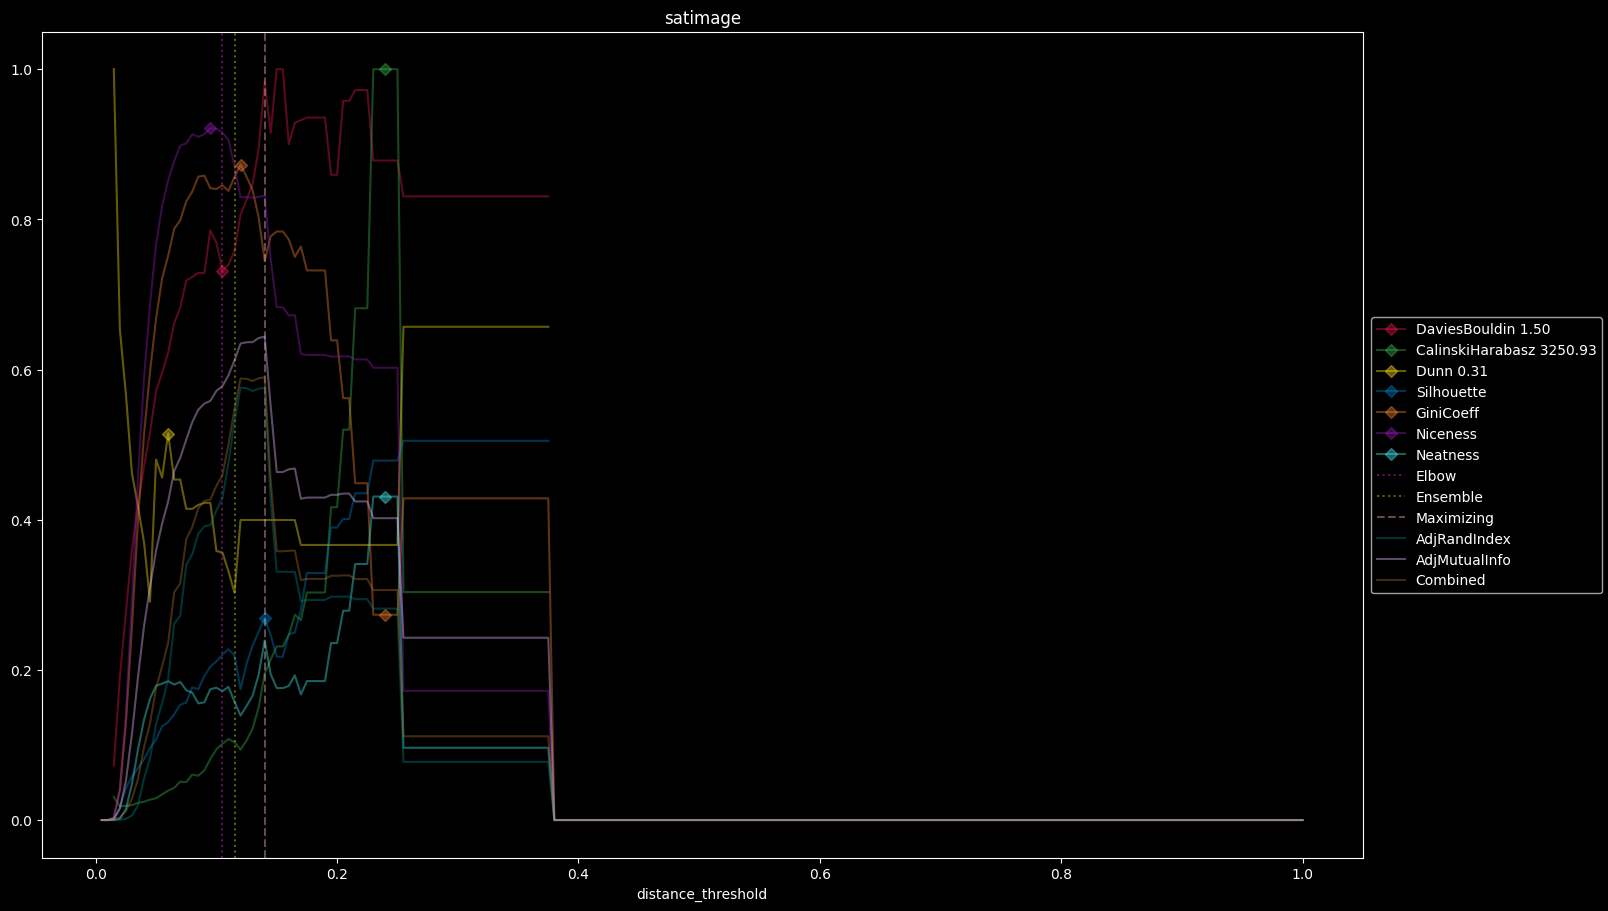

{'Silhouette': 0.2694170457295688, 'Niceness': 0.8314859384082329, 'GiniCoeff': 0.744635310529699, 'Neatness': 0.23918631658311654, 'sample': {'distance_threshold': 0.14, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 1, 2: 1, 3: 1, 5: 1, 8: 1, 10: 1, 11: 1, 12: 3, 27: 1, 122: 1, 149: 1, 211: 1, 303: 1, 537: 1, 575: 1}, 'DaviesBouldin': 1.4789003076808225, 'CalinskiHarabasz': 634.061760255477, 'Dunn': 0.12338115215385664, 'AdjRandIndex': 0.5756949511890136, 'AdjMutualInfo': 0.6438350290969574, 'Combined': 0.5897158693356145}
1    476
7    469
3    422
5    220
2    218
4    195
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d     36.000000
k      6.000000
e      1.721394
g      0.205766
Name: satimage, dtype: float64


  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

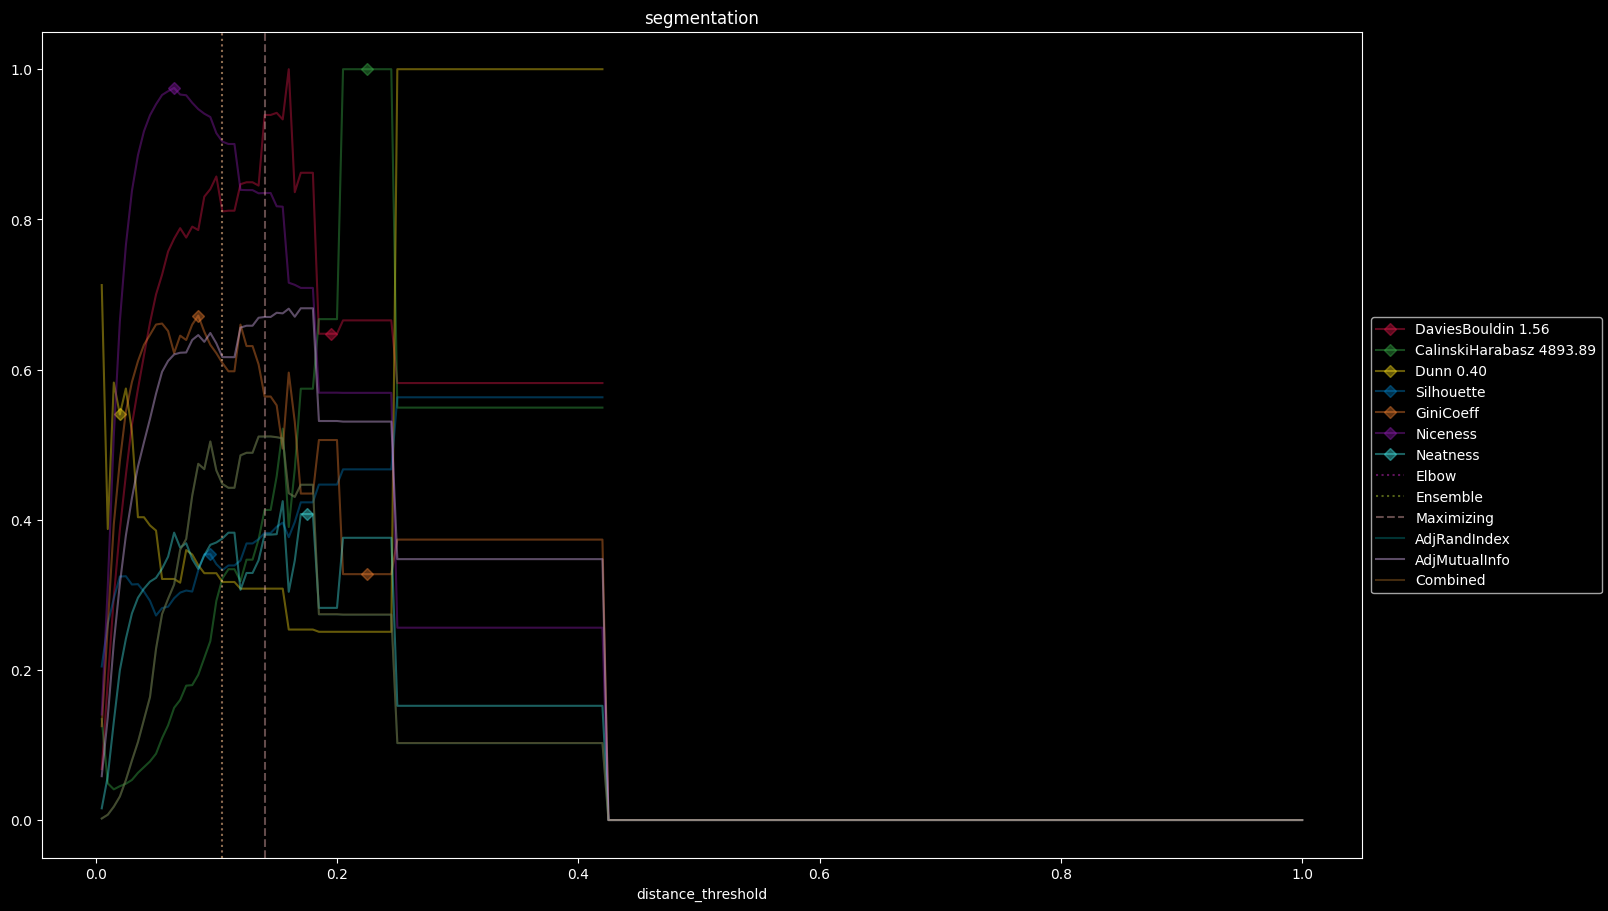

{'Silhouette': 0.38236731448158007, 'Niceness': 0.8351222283538079, 'GiniCoeff': 0.5640432457568008, 'Neatness': 0.3801081927691924, 'sample': {'distance_threshold': 0.14, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {2: 1, 6: 1, 13: 1, 34: 1, 61: 1, 252: 1, 285: 1, 303: 1, 474: 1, 570: 1}, 'DaviesBouldin': 1.4685202733927054, 'CalinskiHarabasz': 2021.1582938982103, 'Dunn': 0.12188791369767714, 'AdjRandIndex': 0.510788531732421, 'AdjMutualInfo': 0.670025972252025, 'Combined': 0.5109075353665158}
5    286
6    286
3    286
2    286
4    286
1    285
0    285
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d     19.000000
k      7.000000
e      1.945909
g      0.000747
Name: segmentation, dtype: float64


  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/675 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

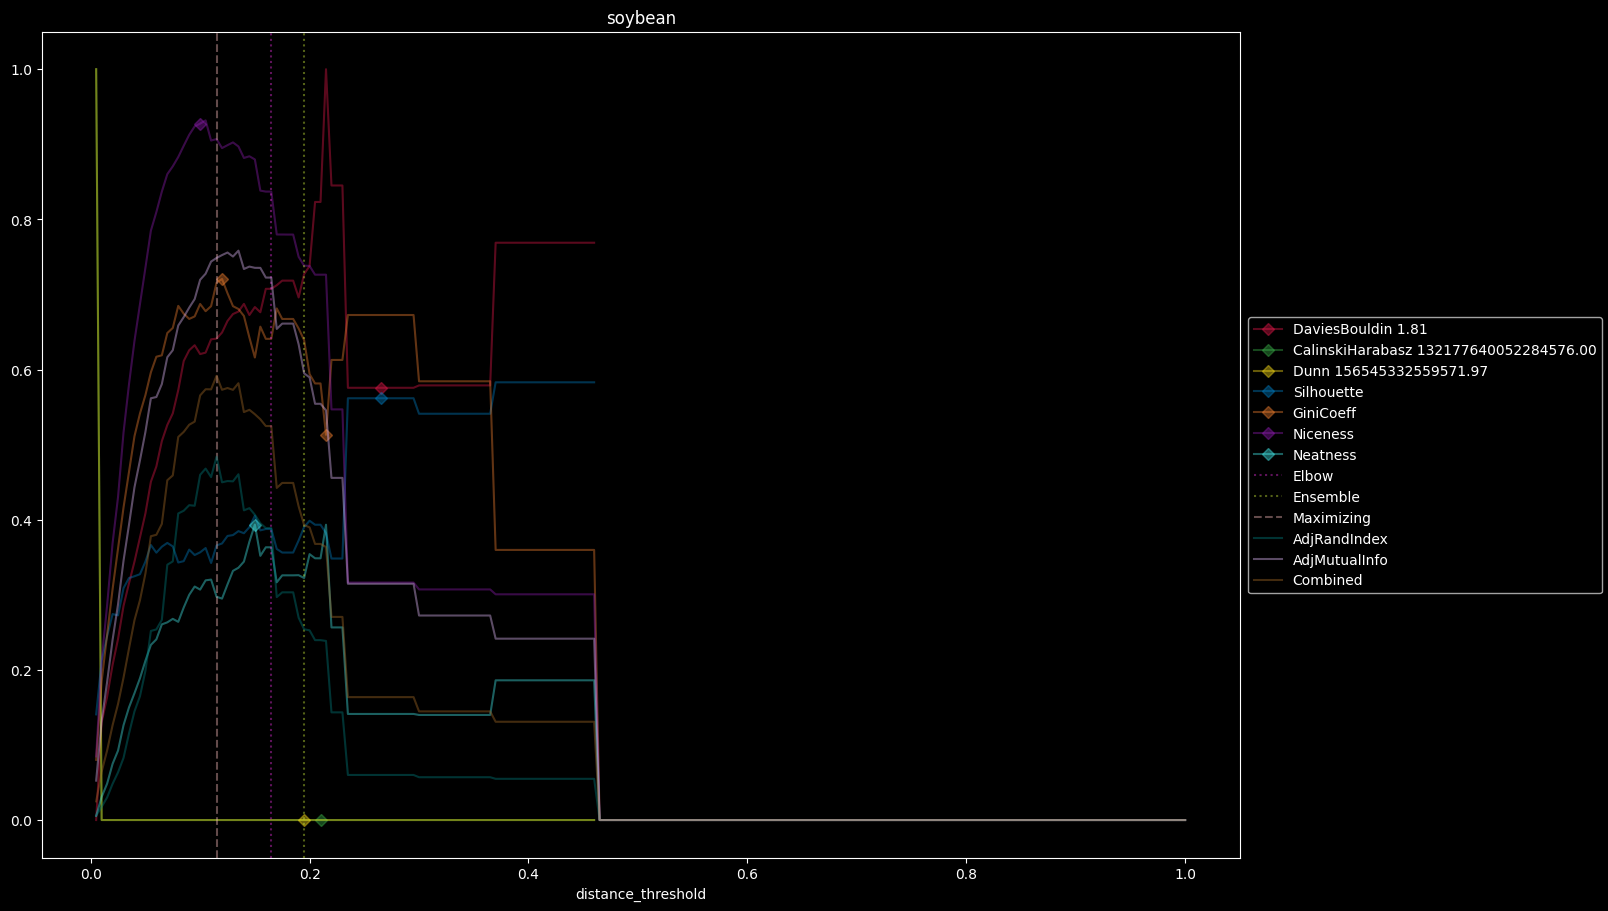

{'Silhouette': 0.3657086058905205, 'Niceness': 0.906976687749207, 'GiniCoeff': 0.7157296940347788, 'Neatness': 0.2973713263426201, 'sample': {'distance_threshold': 0.115, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 8, 2: 5, 3: 3, 4: 2, 5: 1, 6: 3, 7: 1, 8: 1, 9: 2, 11: 1, 14: 1, 15: 1, 16: 1, 20: 5, 24: 2, 31: 1, 40: 1, 59: 1, 68: 1, 182: 1}, 'DaviesBouldin': 1.1633229397833613, 'CalinskiHarabasz': 270.4763451823251, 'Dunn': 0.30821291703617026, 'AdjRandIndex': 0.4838132251747757, 'AdjMutualInfo': 0.7486103588517, 'Combined': 0.5916161685061194}
5     92
12    91
1     91
15    88
6     44
2     44
10    20
17    20
14    20
4     20
7     20
3     20
11    20
16    20
18    20
0     16
9     15
8     14
Name: count, dtype: int64
Dataset Summary
n   675.000000
d    35.000000
k    18.000000
e     2.625593
g     0.407115
Name: soybean, dtype: float64


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

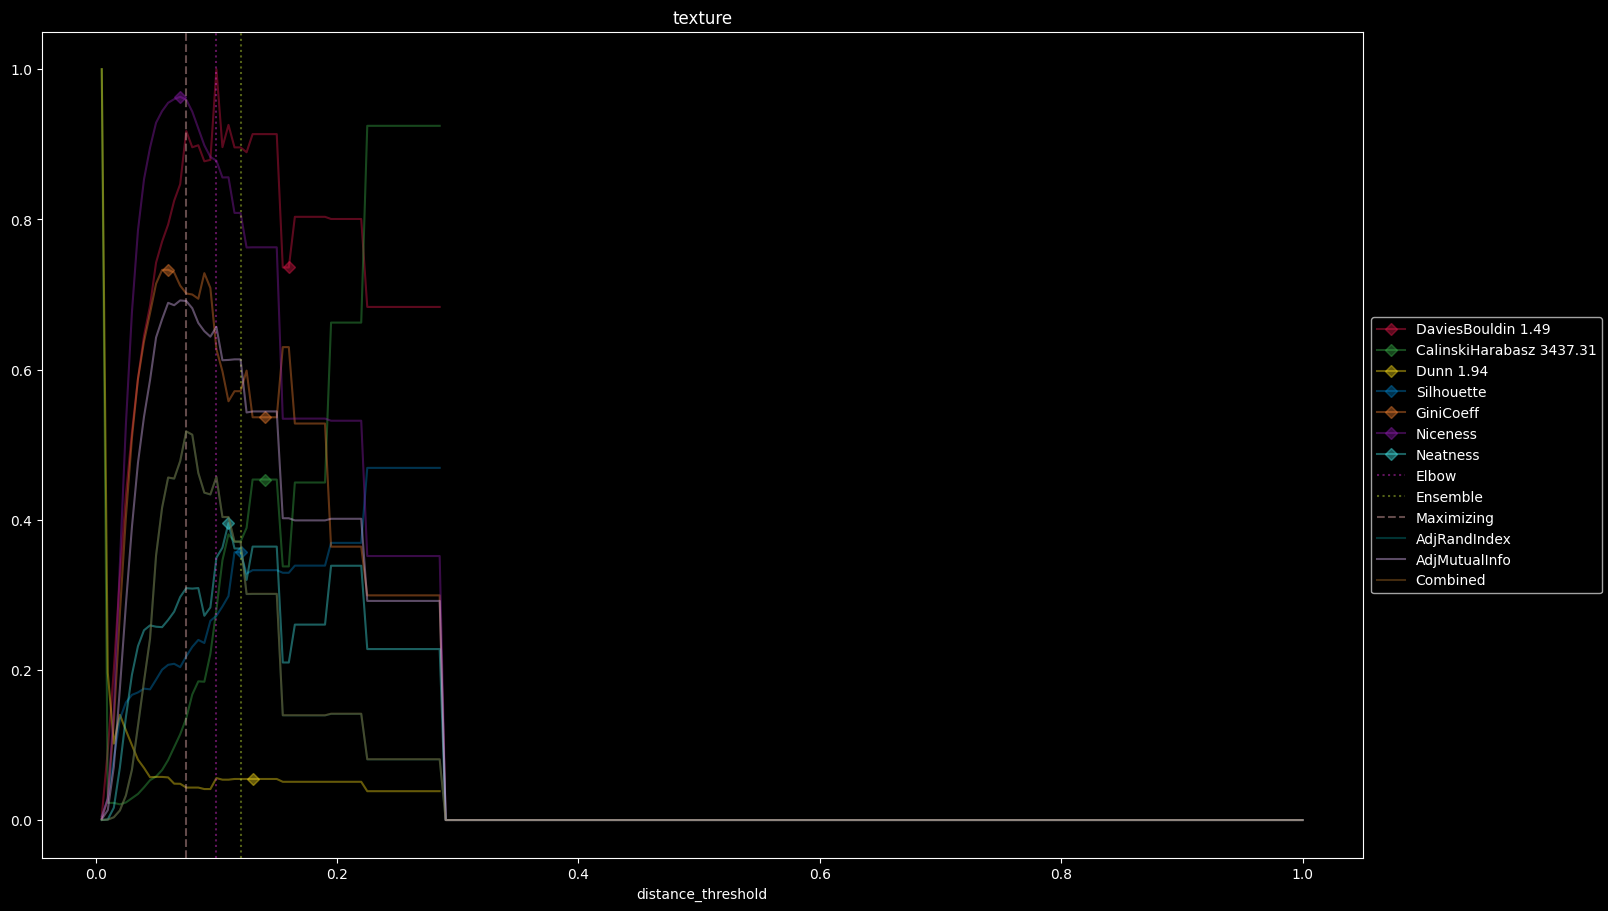

{'Silhouette': 0.21798527641483204, 'Niceness': 0.9594132217694266, 'GiniCoeff': 0.701370320855615, 'Neatness': 0.3088053023673145, 'sample': {'distance_threshold': 0.075, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 7, 2: 4, 3: 4, 4: 2, 5: 1, 6: 3, 7: 3, 9: 1, 11: 1, 13: 1, 14: 1, 16: 1, 19: 1, 25: 2, 35: 1, 38: 1, 48: 1, 77: 1, 92: 1, 93: 1, 103: 1, 106: 1, 112: 1, 113: 1, 117: 1, 125: 1, 167: 1, 169: 1, 181: 1, 213: 1}, 'DaviesBouldin': 1.3665737214585476, 'CalinskiHarabasz': 466.09632634342574, 'Dunn': 0.0840116380455279, 'AdjRandIndex': 0.5175222769733951, 'AdjMutualInfo': 0.6912242284647552, 'Combined': 0.5176709723938132}
6     182
13    182
12    182
4     182
9     182
7     182
3     182
10    182
14    182
8     181
2     181
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d     40.000000
k     11.000000
e      2.397893
g      0.000856
Name: texture, dtype: float64


  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/959 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

{'Silhouette': 0.4078333297685654, 'Niceness': 0.37313134542006177, 'GiniCoeff': 0.29229525862068967, 'Neatness': 0.2472083968844234, 'sample': {'distance_threshold': 0.26, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {217: 1, 742: 1}, 'DaviesBouldin': 1.598376451051455, 'CalinskiHarabasz': 1299.2609864788458, 'Dunn': 0.17959271793193785, 'AdjRandIndex': 0.46813161453635177, 'AdjMutualInfo': 0.4086319445671108, 'Combined': 0.4592868090705578}
1    613
0    346
Name: count, dtype: int64
Dataset Summary
n   959.000000
d    44.000000
k     2.000000
e     0.653873
g     0.148653
Name: tokyo1, dtype: float64


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

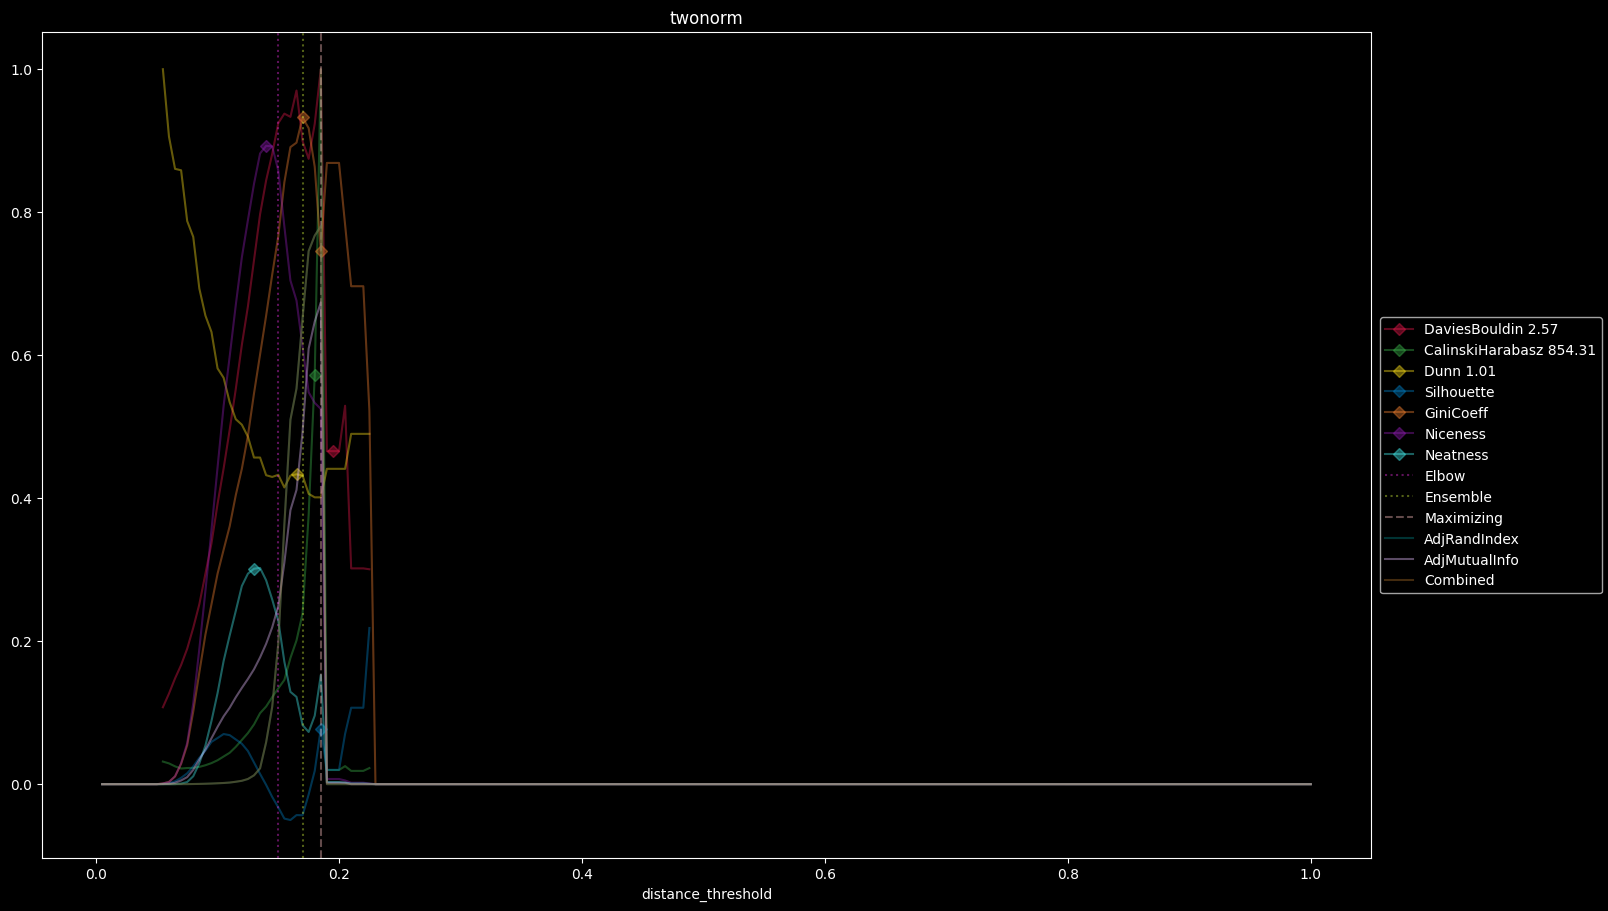

{'Silhouette': 0.0775023137169547, 'Niceness': 0.5248969767402777, 'GiniCoeff': 0.7456903710100641, 'Neatness': 0.152600750560932, 'sample': {'distance_threshold': 0.185, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 4, 3: 1, 987: 1, 1006: 1}, 'DaviesBouldin': 2.5666555779103493, 'CalinskiHarabasz': 854.3146879093432, 'Dunn': 0.40603495003051276, 'AdjRandIndex': 0.7804794296940456, 'AdjMutualInfo': 0.673834694478911, 'Combined': 0.7804236401906198}
0    1001
1     999
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d     20.000000
k      2.000000
e      0.693147
g      0.000523
Name: twonorm, dtype: float64


  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/178 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

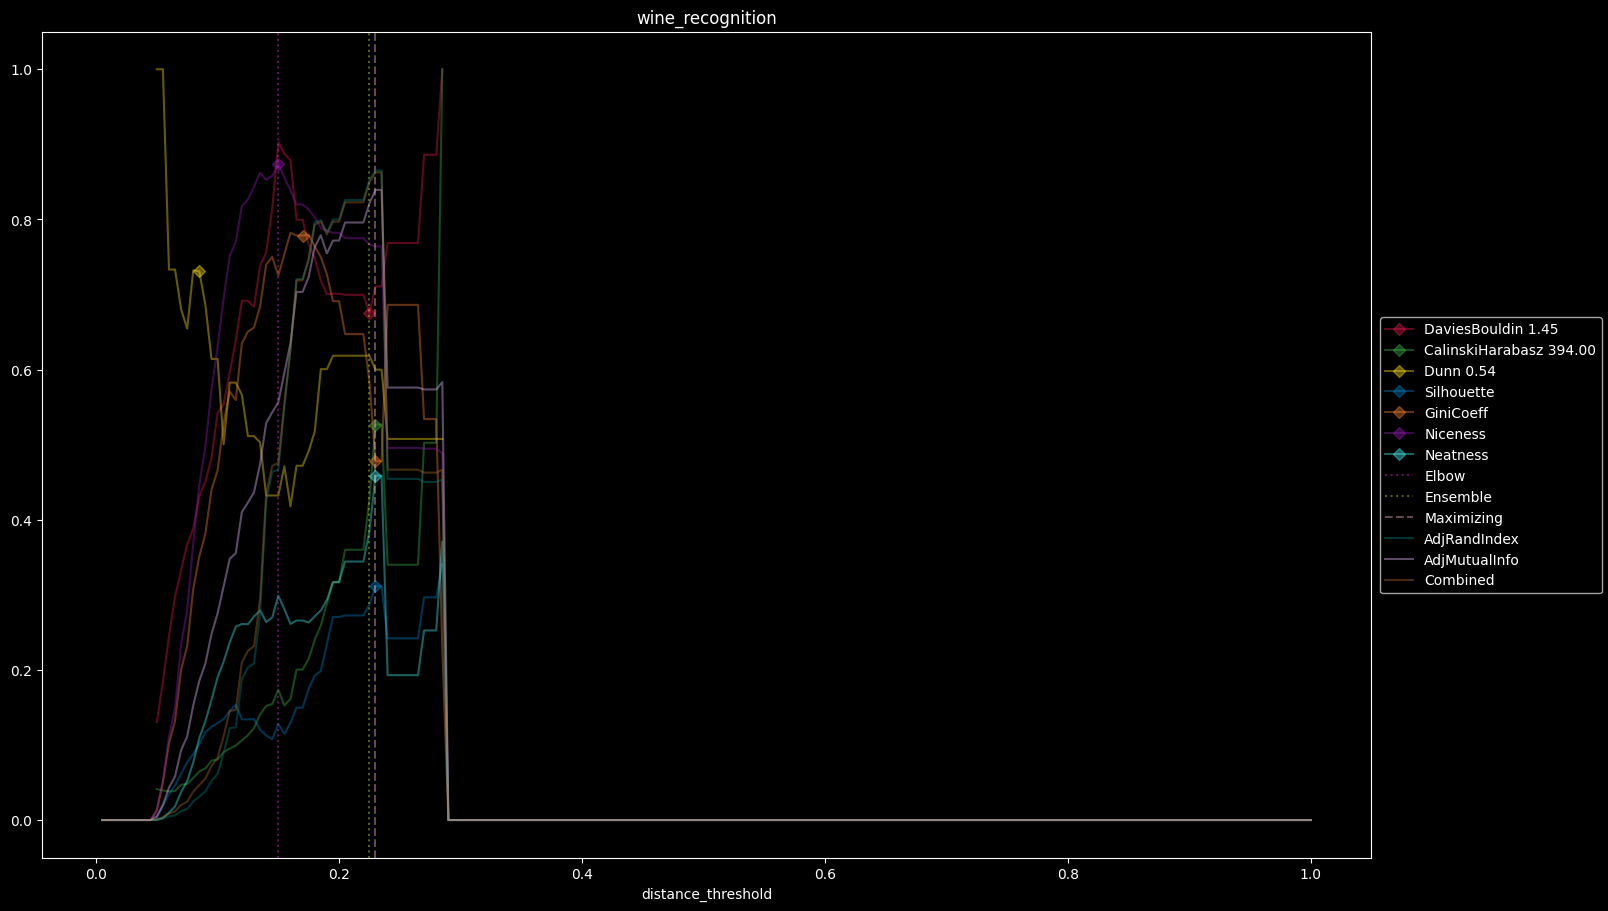

{'Silhouette': 0.3115524014498681, 'Niceness': 0.7639555174228954, 'GiniCoeff': 0.477979797979798, 'Neatness': 0.45874794703543353, 'sample': {'distance_threshold': 0.23, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 2, 53: 1, 61: 1, 62: 1}, 'DaviesBouldin': 1.0332821878296703, 'CalinskiHarabasz': 207.5470918496055, 'Dunn': 0.3235339555455477, 'AdjRandIndex': 0.8651168482162414, 'AdjMutualInfo': 0.8393073258750644, 'Combined': 0.862518515832399}
2    71
1    59
3    48
Name: count, dtype: int64
Dataset Summary
n   178.000000
d    13.000000
k     3.000000
e     1.086038
g     0.100673
Name: wine_recognition, dtype: float64


In [2]:
# https://github.com/EpistasisLab/pmlb/issues/167
# deprecated = [
#     "cmc",
#     "195_auto_price",
#     "207_autoPrice",
#     "glass",
#     "heart_c",
#     "cleve",
#     "cleveland_nominal",
#     "heart_statlog",
#     "heart_h",
#     "colic",
#     "vote",
#     "wdbc",
#     "australian",
#     "buggyCrx",
#     "crx",
#     "breast_w",
#     "pima",
#     "german",
#     "flare",
#     "car_evaluation",
#     "kr_vs_kp",
#     "294_satellite_image",
#     "197_cpu_act",
#     "227_cpu_small",
#     "562_cpu_small",
#     "1595_poker",
# ]

classification_dataset_names = [
    "agaricus_lepiota",
    "analcatdata_authorship",
    "breast",
    "breast_cancer_wisconsin",
    "collins",
    "confidence",
    "dermatology",
    "ecoli",
    "house_votes_84",
    "iris",
    "kddcup",
    "mfeat_factors",
    "mfeat_fourier",
    "mfeat_karhunen",
    "mfeat_morphological",
    "mfeat_pixel",
    "new_thyroid",
    "optdigits",
    "pendigits",
    "penguins",
    "ring",
    "satimage",
    "segmentation",
    "soybean",
    "texture",
    "tokyo1",
    'twonorm',
    "wine_recognition",
]

max_size = 2000

max_muti = 0
max_rand = 0
max_combo = 0
results = 0
ranks = 0
d = {}
r = {}

for classification_dataset in classification_dataset_names:
    X, y = fetch_data(
        classification_dataset, return_X_y=True, local_cache_dir="/Users/temp/pmlb_data"
    )
    if len(X) > max_size:
        _, X, _, y = train_test_split(X, y, test_size=max_size, random_state=42, stratify=y)
    X = pd.DataFrame(X)
    y = pd.Series(y)
    if X.shape[1] > 2:
        vis = pd.DataFrame(
            umap.UMAP(random_state=42).fit_transform(X), columns=list("ab"), index=X.index
        )
    elif X.shape[1] == 2:
        vis = X.copy()
        vis.columns = list("ab")
    else:
        vis = X.copy()
        vis.columns = ["a"]
        vis["b"] = 0.0
    kwargs = dict(
        df=X,
        title=f"{classification_dataset}",
        actual=y,
    )
    if "precomputed" in inspect.getfullargspec(optimize).args:
        kwargs["precomputed"] = True
        kwargs["chunksize"] = 20
    clusters, (score, res) = optimize(**kwargs)
    # print(res)
    # plt.title(f"{classification_dataset} - Actual")
    # scatterplot(vis, x="a", y="b", hue=y, alpha=0.5, palette="bright", legend=False)
    # plt.show()
    # plt.title(f"{classification_dataset} - Best Possible Prediction")
    # scatterplot(vis, x="a", y="b", hue=clusters, alpha=0.5, palette="bright", legend=False)
    # plt.show()
    rank = res.rank(ascending=False)
    max_muti += res.max_muti
    max_rand += res.max_rand
    max_combo += res.max_combo
    results += res
    ranks += rank
    res = res.Combined
    res["n"], res["d"] = X.shape
    res["k"] = len(np.unique(y))
    _, counts = np.unique(y, return_counts=True)
    res["e"] = entropy(counts)
    res["g"] = gini_coefficient(counts)
    res.name = classification_dataset
    d[classification_dataset] = res
    res.index.name = "Dataset Summary"
    print(res[["n", "d", "k", "e", "g"]])
    res.index.name = "Metric"
    rank = rank.Combined
    rank["n"], rank["d"], rank["k"], rank["e"], rank["g"] = res[["n", "d", "k", "e", "g"]]
    r[classification_dataset] = rank

denom = len(classification_dataset_names)

max_muti /= denom
max_rand /= denom
max_combo /= denom
results /= denom
ranks /= denom
df = pd.DataFrame(d).T
df_rank = pd.DataFrame(r).T

# Results

In [3]:
print("Average Mutual Information:", max_muti)
print("Average Rand Index:", max_rand)
print("Average Combined:", max_combo)

Average Mutual Information: 0.6796705121938037
Average Rand Index: 0.6488345455229328
Average Combined: 0.6486852614314988


### Results across all datasets
- Averages per metric broken down by Mutual Information, Rand Index, and Combined
- Summary statistics
- Correlation matrix
- Mann-Whitney U test

### Raw Scores

In [4]:
results

AdjMutualInfo  AdjRandIndex  Combined
Metric                                                 
BIC                    0.000000      0.000000  0.000000
DaviesBouldin          0.500081      0.418108  0.419547
CalinskiHarabasz       0.510472      0.446434  0.452217
Dunn                   0.484989      0.393456  0.399849
Silhouette             0.593874      0.509778  0.512508
GiniCoeff_peak         0.539774      0.450976  0.455036
GiniCoeff_trough       0.576650      0.493786  0.498941
Niceness               0.541840      0.409187  0.424280
Neatness               0.574188      0.458016  0.468865
Elbow                  0.562492      0.463966  0.472690
Ensemble               0.620467      0.557395  0.561513

In [5]:
df.describe()

Metric       BIC  DaviesBouldin  CalinskiHarabasz      Dunn  Silhouette  \
count  28.000000      28.000000         28.000000 28.000000   28.000000   
mean    0.000000       0.419547          0.452217  0.399849    0.512508   
std     0.000000       0.254854          0.277034  0.247652    0.244363   
min     0.000000       0.000002          0.000063  0.000199    0.049997   
25%     0.000000       0.219333          0.259011  0.221583    0.326384   
50%     0.000000       0.459667          0.479192  0.364802    0.585928   
75%     0.000000       0.610296          0.658857  0.600512    0.697979   
max     0.000000       0.937141          0.909557  0.963614    0.909557   

Metric  GiniCoeff_peak  GiniCoeff_trough  Niceness  Neatness     Elbow  \
count        28.000000         28.000000 28.000000 28.000000 28.000000   
mean          0.455036          0.498941  0.424280  0.468865  0.472690   
std           0.207823          0.232912  0.186503  0.239939  0.151268   
min           0.003386          0.000000  0.058755  0.012396  0.197072   
25%           0.329379          0.306087  0.321436  0.302439  0.346949   
50%           0.502422          0.560988  0.440122  0.436742  0.469040   
75%           0.588334          0.646252  0.547161  0.622747  0.604579   
max           0.781553          0.909557  0.817644  0.909557  0.694967   

Metric  Ensemble           n          d         k         e         g  
count  28.000000   28.000000  28.000000 28.000000 28.000000 28.000000  
mean    0.561513 1225.142857  42.178571  6.535714  1.543482  0.143445  
std     0.172492  810.794430  56.517486  4.307462  0.716043  0.193266  
min     0.277974   72.000000   3.000000  2.000000  0.644154  0.000000  
25%     0.441213  417.750000  12.250000  2.750000  0.789399  0.000392  
50%     0.577859 1479.500000  22.500000  6.000000  1.545430  0.060799  
75%     0.652651 2000.000000  41.750000 10.000000  2.302585  0.222515  
max     0.963614 2000.000000 240.000000 18.000000  2.625593  0.817516

In [6]:
df.corr()

Metric            BIC  DaviesBouldin  CalinskiHarabasz      Dunn  Silhouette  \
Metric                                                                         
BIC               NaN            NaN               NaN       NaN         NaN   
DaviesBouldin     NaN       1.000000          0.642058  0.126238    0.632037   
CalinskiHarabasz  NaN       0.642058          1.000000  0.448587    0.622843   
Dunn              NaN       0.126238          0.448587  1.000000    0.179430   
Silhouette        NaN       0.632037          0.622843  0.179430    1.000000   
GiniCoeff_peak    NaN       0.573240          0.750628  0.165740    0.638500   
GiniCoeff_trough  NaN       0.397448          0.694956  0.587577    0.599560   
Niceness          NaN       0.282131         -0.037650  0.162849    0.108360   
Neatness          NaN       0.719764          0.358852  0.187130    0.503539   
Elbow             NaN       0.428095          0.072251  0.211754    0.248744   
Ensemble          NaN       0.635921          0.556188  0.438914    0.738045   
n                 NaN      -0.490825         -0.570925 -0.231087   -0.169491   
d                 NaN      -0.080081         -0.475126 -0.185869    0.164084   
k                 NaN      -0.247365         -0.454398 -0.187544   -0.281463   
e                 NaN      -0.218268         -0.596309 -0.326486   -0.297313   
g                 NaN       0.325922          0.504729  0.494985    0.355376   

Metric            GiniCoeff_peak  GiniCoeff_trough  Niceness  Neatness  \
Metric                                                                   
BIC                          NaN               NaN       NaN       NaN   
DaviesBouldin           0.573240          0.397448  0.282131  0.719764   
CalinskiHarabasz        0.750628          0.694956 -0.037650  0.358852   
Dunn                    0.165740          0.587577  0.162849  0.187130   
Silhouette              0.638500          0.599560  0.108360  0.503539   
GiniCoeff_peak          1.000000          0.485194  0.222835  0.389727   
GiniCoeff_trough        0.485194          1.000000  0.016782  0.409261   
Niceness                0.222835          0.016782  1.000000  0.567053   
Neatness                0.389727          0.409261  0.567053  1.000000   
Elbow                   0.368944          0.249631  0.804360  0.579366   
Ensemble                0.544718          0.745255  0.396120  0.689534   
n                      -0.365001         -0.456171  0.080796 -0.270037   
d                      -0.267273         -0.056549  0.232205  0.254243   
k                      -0.033208         -0.299788  0.579212  0.132603   
e                      -0.154222         -0.397756  0.509717  0.069921   
g                       0.494052          0.429979  0.273625  0.393340   

Metric               Elbow  Ensemble         n         d         k         e  \
Metric                                                                         
BIC                    NaN       NaN       NaN       NaN       NaN       NaN   
DaviesBouldin     0.428095  0.635921 -0.490825 -0.080081 -0.247365 -0.218268   
CalinskiHarabasz  0.072251  0.556188 -0.570925 -0.475126 -0.454398 -0.596309   
Dunn              0.211754  0.438914 -0.231087 -0.185869 -0.187544 -0.326486   
Silhouette        0.248744  0.738045 -0.169491  0.164084 -0.281463 -0.297313   
GiniCoeff_peak    0.368944  0.544718 -0.365001 -0.267273 -0.033208 -0.154222   
GiniCoeff_trough  0.249631  0.745255 -0.456171 -0.056549 -0.299788 -0.397756   
Niceness          0.804360  0.396120  0.080796  0.232205  0.579212  0.509717   
Neatness          0.579366  0.689534 -0.270037  0.254243  0.132603  0.069921   
Elbow             1.000000  0.552796 -0.061944  0.355855  0.405032  0.406265   
Ensemble          0.552796  1.000000 -0.227145  0.194979 -0.086005 -0.090952   
n                -0.061944 -0.227145  1.000000  0.405125  0.337582  0.354914   
d                 0.355855  0.194979  0.405125  1.000000  0.337486  0.395907   
k                 0.405032

In [7]:
columns = df.columns[:-5]
pd.DataFrame([[mannwhitneyu(df[x], df[y]).pvalue for x in columns]
              for y in columns], index=columns, columns=columns)

Metric                BIC  DaviesBouldin  CalinskiHarabasz     Dunn  \
Metric                                                                
BIC              1.000000       0.000000          0.000000 0.000000   
DaviesBouldin    0.000000       1.000000          0.571832 0.793172   
CalinskiHarabasz 0.000000       0.571832          1.000000 0.491282   
Dunn             0.000000       0.793172          0.491282 1.000000   
Silhouette       0.000000       0.146979          0.389546 0.088332   
GiniCoeff_peak   0.000000       0.481016          0.902184 0.286802   
GiniCoeff_trough 0.000000       0.254751          0.588554 0.129561   
Niceness         0.000000       0.980390          0.640476 0.517451   
Neatness         0.000000       0.455908          0.812150 0.305735   
Elbow            0.000000       0.426736          0.902184 0.158749   
Ensemble         0.000000       0.029895          0.140222 0.007933   

Metric            Silhouette  GiniCoeff_peak  GiniCoeff_trough  Niceness  \
Metric                                                                     
BIC                 0.000000        0.000000          0.000000  0.000000   
DaviesBouldin       0.146979        0.481016          0.254751  0.980390   
CalinskiHarabasz    0.389546        0.902184          0.588554  0.640476   
Dunn                0.088332        0.286802          0.129561  0.517451   
Silhouette          1.000000        0.209990          0.761739  0.115681   
GiniCoeff_peak      0.209990        1.000000          0.486153  0.354521   
GiniCoeff_trough    0.761739        0.486153          1.000000  0.261651   
Niceness            0.115681        0.354521          0.261651  1.000000   
Neatness            0.475892        0.902185          0.670018  0.594317   
Elbow               0.333624        0.915171          0.652250  0.321472   
Ensemble            0.617157        0.096248          0.247947  0.011888   

Metric            Neatness    Elbow  Ensemble  
Metric                                         
BIC               0.000000 0.000000  0.000000  
DaviesBouldin     0.455908 0.426736  0.029895  
CalinskiHarabasz  0.812150 0.902184  0.140222  
Dunn              0.305735 0.158749  0.007933  
Silhouette        0.475892 0.333624  0.617157  
GiniCoeff_peak    0.902185 0.915171  0.096248  
GiniCoeff_trough  0.670018 0.652250  0.247947  
Niceness          0.594317 0.321472  0.011888  
Neatness          1.000000 0.889222  0.108264  
Elbow             0.889222 1.000000  0.070161  
Ensemble          0.108264 0.070161  1.000000

### Ranks

In [8]:
ranks

AdjMutualInfo  AdjRandIndex  Combined
Metric                                                 
BIC                   11.000000     10.982143 11.000000
DaviesBouldin          6.035714      6.250000  6.214286
CalinskiHarabasz       5.839286      5.696429  5.660714
Dunn                   6.678571      6.607143  6.678571
Silhouette             4.696429      4.589286  4.553571
GiniCoeff_peak         6.071429      5.892857  5.964286
GiniCoeff_trough       5.464286      5.375000  5.321429
Niceness               5.875000      5.839286  5.875000
Neatness               4.964286      5.357143  5.321429
Elbow                  5.464286      5.571429  5.571429
Ensemble               3.910714      3.839286  3.839286

In [9]:
df_rank.describe()

Metric       BIC  DaviesBouldin  CalinskiHarabasz      Dunn  Silhouette  \
count  28.000000      28.000000         28.000000 28.000000   28.000000   
mean   11.000000       6.214286          5.660714  6.678571    4.553571   
std     0.000000       2.806832          2.925158  3.206516    2.948130   
min    11.000000       1.000000          1.500000  1.000000    1.000000   
25%    11.000000       5.000000          2.500000  4.375000    2.000000   
50%    11.000000       6.000000          5.500000  7.500000    3.500000   
75%    11.000000       8.500000          8.000000 10.000000    6.625000   
max    11.000000      10.000000         10.000000 10.000000   10.000000   

Metric  GiniCoeff_peak  GiniCoeff_trough  Niceness  Neatness     Elbow  \
count        28.000000         28.000000 28.000000 28.000000 28.000000   
mean          5.964286          5.321429  5.875000  5.321429  5.571429   
std           2.606717          2.684711  3.167032  2.819293  2.425613   
min           1.000000          1.500000  1.000000  2.000000  1.000000   
25%           4.000000          2.500000  2.750000  2.500000  4.000000   
50%           6.000000          5.250000  6.000000  4.750000  5.750000   
75%           8.125000          8.000000  9.000000  7.625000  7.625000   
max          10.000000         10.000000 10.000000 10.000000  9.000000   

Metric  Ensemble           n          d         k         e         g  
count  28.000000   28.000000  28.000000 28.000000 28.000000 28.000000  
mean    3.839286 1225.142857  42.178571  6.535714  1.543482  0.143445  
std     1.666964  810.794430  56.517486  4.307462  0.716043  0.193266  
min     1.500000   72.000000   3.000000  2.000000  0.644154  0.000000  
25%     2.375000  417.750000  12.250000  2.750000  0.789399  0.000392  
50%     3.750000 1479.500000  22.500000  6.000000  1.545430  0.060799  
75%     5.500000 2000.000000  41.750000 10.000000  2.302585  0.222515  
max     6.500000 2000.000000 240.000000 18.000000  2.625593  0.817516

In [10]:
df_rank.corr()

Metric            BIC  DaviesBouldin  CalinskiHarabasz      Dunn  Silhouette  \
Metric                                                                         
BIC               NaN            NaN               NaN       NaN         NaN   
DaviesBouldin     NaN       1.000000          0.026099 -0.339794    0.108219   
CalinskiHarabasz  NaN       0.026099          1.000000  0.136018   -0.081562   
Dunn              NaN      -0.339794          0.136018  1.000000   -0.419288   
Silhouette        NaN       0.108219         -0.081562 -0.419288    1.000000   
GiniCoeff_peak    NaN      -0.208990         -0.117008 -0.403544   -0.023839   
GiniCoeff_trough  NaN      -0.186418          0.639294  0.192069    0.001253   
Niceness          NaN      -0.171867         -0.663405 -0.200136   -0.346349   
Neatness          NaN      -0.039449         -0.121017  0.125543   -0.057849   
Elbow             NaN      -0.230811         -0.437543 -0.257653   -0.246570   
Ensemble          NaN       0.088770         -0.661018  0.015962    0.148776   
n                 NaN       0.237684          0.564150 -0.071838   -0.107311   
d                 NaN       0.042008          0.478570  0.045392   -0.204449   
k                 NaN       0.143322          0.654289  0.160412    0.280561   
e                 NaN      -0.007400          0.833276  0.280797    0.159071   
g                 NaN       0.063050         -0.358339 -0.188920    0.015100   

Metric            GiniCoeff_peak  GiniCoeff_trough  Niceness  Neatness  \
Metric                                                                   
BIC                          NaN               NaN       NaN       NaN   
DaviesBouldin          -0.208990         -0.186418 -0.171867 -0.039449   
CalinskiHarabasz       -0.117008          0.639294 -0.663405 -0.121017   
Dunn                   -0.403544          0.192069 -0.200136  0.125543   
Silhouette             -0.023839          0.001253 -0.346349 -0.057849   
GiniCoeff_peak          1.000000         -0.252330  0.343764 -0.527546   
GiniCoeff_trough       -0.252330          1.000000 -0.573356 -0.076545   
Niceness                0.343764         -0.573356  1.000000 -0.099035   
Neatness               -0.527546         -0.076545 -0.099035  1.000000   
Elbow                   0.404594         -0.579510  0.626766 -0.237721   
Ensemble               -0.131353         -0.333546  0.192487 -0.069379   
n                      -0.120475          0.298631 -0.415450  0.036678   
d                       0.266902          0.115186 -0.056773 -0.349268   
k                      -0.304997          0.402512 -0.676363 -0.188544   
e                      -0.285313          0.488957 -0.695837 -0.114316   
g                       0.098654         -0.169534  0.269251 -0.166770   

Metric               Elbow  Ensemble         n         d         k         e  \
Metric                                                                         
BIC                    NaN       NaN       NaN       NaN       NaN       NaN   
DaviesBouldin    -0.230811  0.088770  0.237684  0.042008  0.143322 -0.007400   
CalinskiHarabasz -0.437543 -0.661018  0.564150  0.478570  0.654289  0.833276   
Dunn             -0.257653  0.015962 -0.071838  0.045392  0.160412  0.280797   
Silhouette       -0.246570  0.148776 -0.107311 -0.204449  0.280561  0.159071   
GiniCoeff_peak    0.404594 -0.131353 -0.120475  0.266902 -0.304997 -0.285313   
GiniCoeff_trough -0.579510 -0.333546  0.298631  0.115186  0.402512  0.488957   
Niceness          0.626766  0.192487 -0.415450 -0.056773 -0.676363 -0.695837   
Neatness         -0.237721 -0.069379  0.036678 -0.349268 -0.188544 -0.114316   
Elbow             1.000000  0.144922 -0.280579 -0.130452 -0.344100 -0.451966   
Ensemble          0.144922  1.000000 -0.219221 -0.350742 -0.260944 -0.439539   
n                -0.280579 -0.219221  1.000000  0.405125  0.337582  0.354914   
d                -0.130452 -0.350742  0.405125  1.000000  0.337486  0.395907   
k                -0.344100

In [11]:
pd.DataFrame([[mannwhitneyu(df_rank[x], df_rank[y]).pvalue for x in columns]
              for y in columns], index=columns, columns=columns)


Metric                BIC  DaviesBouldin  CalinskiHarabasz     Dunn  \
Metric                                                                
BIC              1.000000       0.000000          0.000000 0.000000   
DaviesBouldin    0.000000       1.000000          0.521318 0.462773   
CalinskiHarabasz 0.000000       0.521318          1.000000 0.190164   
Dunn             0.000000       0.462773          0.190164 1.000000   
Silhouette       0.000000       0.058825          0.141065 0.017019   
GiniCoeff_peak   0.000000       0.627625          0.669139 0.242439   
GiniCoeff_trough 0.000000       0.233316          0.604163 0.069064   
Niceness         0.000000       0.875800          0.811570 0.269680   
Neatness         0.000000       0.240020          0.692896 0.090006   
Elbow            0.000000       0.312045          0.817961 0.088825   
Ensemble         0.000000       0.001505          0.022792 0.001236   

Metric            Silhouette  GiniCoeff_peak  GiniCoeff_trough  Niceness  \
Metric                                                                     
BIC                 0.000000        0.000000          0.000000  0.000000   
DaviesBouldin       0.058825        0.627625          0.233316  0.875800   
CalinskiHarabasz    0.141065        0.669139          0.604163  0.811570   
Dunn                0.017019        0.242439          0.069064  0.269680   
Silhouette          1.000000        0.049631          0.274353  0.141031   
GiniCoeff_peak      0.049631        1.000000          0.352721  0.993436   
GiniCoeff_trough    0.274353        0.352721          1.000000  0.425452   
Niceness            0.141031        0.993436          0.425452  1.000000   
Neatness            0.236434        0.336188          0.973755  0.616051   
Elbow               0.157758        0.598555          0.748395  0.499990   
Ensemble            0.553787        0.002122          0.043174  0.011022   

Metric            Neatness    Elbow  Ensemble  
Metric                                         
BIC               0.000000 0.000000  0.000000  
DaviesBouldin     0.240020 0.312045  0.001505  
CalinskiHarabasz  0.692896 0.817961  0.022792  
Dunn              0.090006 0.088825  0.001236  
Silhouette        0.236434 0.157758  0.553787  
GiniCoeff_peak    0.336188 0.598555  0.002122  
GiniCoeff_trough  0.973755 0.748395  0.043174  
Niceness          0.616051 0.499990  0.011022  
Neatness          1.000000 0.717563  0.059824  
Elbow             0.717563 1.000000  0.007037  
Ensemble          0.059824 0.007037  1.000000